# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">🕵️‍♂️💊 Unmasking Ibuprofen: Adverse Drug Events Analysis📊</p>


# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Import Packages</p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import ast
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# Set the default renderer for both Plotly Express and Graph Objects
pio.renderers.default = 'iframe_connected'
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Load Dataset and Display First Few Rows</p>


In [2]:
df=pd.read_csv("/kaggle/input/drug-adverse-events-ibuprofen/openfda_drug_event_ibuprofen.csv")
df.head(10)

,safetyreportversion,safetyreportid,primarysourcecountry,transmissiondateformat,transmissiondate,reporttype,serious,seriousnessother,receivedateformat,receivedate,...,patient.patientonsetageunit,patient.patientweight,seriousnesslifethreatening,patient.patientagegroup,patient.summary.narrativeincludeclinical,seriousnessdisabling,seriousnessdeath,authoritynumb,primarysource.literaturereference,seriousnesscongenitalanomali
0,1,10003301,US,102,20141002,1,1,1.0,102,20140228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10003319,US,102,20141212,1,1,NaN,102,20140312,...,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,10003865,US,102,20141002,1,1,NaN,102,20140312,...,801.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,10004019,DE,102,20141212,2,1,NaN,102,20140312,...,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,10004183,US,102,20141212,1,2,NaN,102,20140312,...,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,10004208,GB,102,20141002,1,1,1.0,102,20140312,...,801.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,10004241,US,102,20141002,1,1,1.0,102,20140312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,10004377,GB,102,20141002,1,1,1.0,102,20140312,...,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,10004379,US,102,20141002,1,2,NaN,102,20140312,...,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,10004622,US,102,20141002,1,2,NaN,102,20140312,...,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Dataset Columns</p>


In [3]:
# Dataset Columns
df.columns

Index(['safetyreportversion', 'safetyreportid', 'primarysourcecountry',
       'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious',
       'seriousnessother', 'receivedateformat', 'receivedate',
       'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria',
       'companynumb', 'duplicate', 'reportduplicate.duplicatesource',
       'reportduplicate.duplicatenumb', 'primarysource.reportercountry',
       'primarysource.qualification', 'sender.sendertype',
       'sender.senderorganization', 'receiver.receivertype',
       'receiver.receiverorganization', 'patient.patientsex',
       'patient.reaction', 'patient.drug', 'occurcountry',
       'seriousnesshospitalization', 'patient.patientonsetage',
       'patient.patientonsetageunit', 'patient.patientweight',
       'seriousnesslifethreatening', 'patient.patientagegroup',
       'patient.summary.narrativeincludeclinical', 'seriousnessdisabling',
       'seriousnessdeath', 'authoritynumb',
       'primarysource.l

# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Check Missing values present in dataset based on percentage</p>


In [4]:
missing_percent=df.isnull().sum()/len(df)*100
print(missing_percent)

safetyreportversion                          0.0
safetyreportid                               0.0
primarysourcecountry                         0.1
transmissiondateformat                       0.0
transmissiondate                             0.0
reporttype                                   0.0
serious                                      0.0
seriousnessother                            52.2
receivedateformat                            0.0
receivedate                                  0.0
receiptdateformat                            0.0
receiptdate                                  0.0
fulfillexpeditecriteria                      0.0
companynumb                                  3.3
duplicate                                    3.3
reportduplicate.duplicatesource              3.3
reportduplicate.duplicatenumb                3.3
primarysource.reportercountry                0.0
primarysource.qualification                  3.8
sender.sendertype                            0.0
sender.senderorganiz

# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Drop columns with missing values percentage >90%</p>


In [5]:
# Drop columns with too many missing values (>90%)
drop_cols = missing_percent[missing_percent >= 85].index
df = df.drop(columns=drop_cols)
print("Dropped columns:", list(drop_cols))

Dropped columns: ['seriousnesslifethreatening', 'patient.patientagegroup', 'patient.summary.narrativeincludeclinical', 'seriousnessdisabling', 'seriousnessdeath', 'authoritynumb', 'primarysource.literaturereference', 'seriousnesscongenitalanomali']


# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Handle Missing values of other Columns</p>


In [6]:
# Columns to impute
cols_to_impute = ["seriousnessother", "patient.patientweight", "seriousnesshospitalization"]

# Encode categorical column if necessary
if df["seriousnessother"].dtype == "object":
    le = LabelEncoder()
    df["seriousnessother"] = df["seriousnessother"].astype(str)
    df["seriousnessother"] = le.fit_transform(df["seriousnessother"])

# Apply Iterative Imputer directly on df
imputer = IterativeImputer(random_state=42, max_iter=20)
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# (Optional) Convert seriousnessother back to original labels
if 'le' in locals():
    df["seriousnessother"] = df["seriousnessother"].round().astype(int)  # round to nearest integer
    df["seriousnessother"] = le.inverse_transform(df["seriousnessother"])

In [7]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Numeric: mean or median
num_imputer = SimpleImputer(strategy='median')   # or 'mean'
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical: mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# If you want fallback to ffill/bfill for categorical with too many rare NaNs:
df[cat_cols] = df[cat_cols].fillna(method='ffill').fillna(method='bfill')


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Check Missing values percentages after handling Missing Values</p>


In [8]:
# Check if missing values are gone
print(df.isnull().sum()/len(df)*100)

safetyreportversion                0.0
safetyreportid                     0.0
primarysourcecountry               0.0
transmissiondateformat             0.0
transmissiondate                   0.0
reporttype                         0.0
serious                            0.0
seriousnessother                   0.0
receivedateformat                  0.0
receivedate                        0.0
receiptdateformat                  0.0
receiptdate                        0.0
fulfillexpeditecriteria            0.0
companynumb                        0.0
duplicate                          0.0
reportduplicate.duplicatesource    0.0
reportduplicate.duplicatenumb      0.0
primarysource.reportercountry      0.0
primarysource.qualification        0.0
sender.sendertype                  0.0
sender.senderorganization          0.0
receiver.receivertype              0.0
receiver.receiverorganization      0.0
patient.patientsex                 0.0
patient.reaction                   0.0
patient.drug             

# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Check Duplicates present in Dataset</p>


In [9]:
# Check if there are any duplicates at all
print("Any duplicates:", df.duplicated().any())

# Total number of duplicate rows
print("Total duplicate rows:", df.duplicated().sum())

Any duplicates: False
Total duplicate rows: 0


# <p style="font-family:cursive; font-size:36px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Correct column names to ensure compatibility</p>


In [10]:

# Correct column names by replacing '.' with '_' to ensure compatibility
# This step standardizes the DataFrame for  analysis without altering data integrity.
df.columns = [col.replace('.', '_') for col in df.columns]
print("Corrected column names:", df.columns.tolist())

Corrected column names: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate_duplicatesource', 'reportduplicate_duplicatenumb', 'primarysource_reportercountry', 'primarysource_qualification', 'sender_sendertype', 'sender_senderorganization', 'receiver_receivertype', 'receiver_receiverorganization', 'patient_patientsex', 'patient_reaction', 'patient_drug', 'occurcountry', 'seriousnesshospitalization', 'patient_patientonsetage', 'patient_patientonsetageunit', 'patient_patientweight']


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">safetyreportversionnum & safetyreportidnum Columns Analysis</p>


In [11]:
# Convert safety report columns to numeric for analysis

# Convert 'safetyreportversion' to numeric
df['safetyreportversion_num'] = pd.to_numeric(df['safetyreportversion'], errors='coerce')

# Convert 'safetyreportid' to numeric
df['safetyreportid_num'] = pd.to_numeric(df['safetyreportid'], errors='coerce')

# Column-wise statistics
print("Statistics for 'safetyreportversion_num':")
print("Count:", df['safetyreportversion_num'].count())
print("Mean:", df['safetyreportversion_num'].mean())
print("Median:", df['safetyreportversion_num'].median())
print("Min:", df['safetyreportversion_num'].min())
print("Max:", df['safetyreportversion_num'].max())
print('-'*50)
print("\nStatistics for 'safetyreportid_num':")
print("Count:", df['safetyreportid_num'].count())
print("Mean:", df['safetyreportid_num'].mean())
print("Median:", df['safetyreportid_num'].median())
print("Min:", df['safetyreportid_num'].min())
print("Max:", df['safetyreportid_num'].max())


Statistics for 'safetyreportversion_num':
Count: 1000
Mean: 1.875
Median: 1.0
Min: 1.0
Max: 13.0
--------------------------------------------------

Statistics for 'safetyreportid_num':
Count: 1000
Mean: 10053327.028
Median: 10051802.5
Min: 10003301.0
Max: 10113524.0


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Version category, country & ID ranges Analysis</p>


In [12]:
# Create simple version category: 'Original' for version 1, 'Updated' for version >1
df['version_category'] = df['safetyreportversion_num'].apply(
    lambda x: 'Original' if x == 1 else ('Updated' if x > 1 else pd.NA)
)

# Inspect distribution
print("Version category counts:\n", df['version_category'].value_counts(dropna=False))
print('-'*50)

# Group by country and version category to get min, max, count of report IDs
id_range_by_group = df.groupby(['primarysourcecountry', 'version_category'])['safetyreportid_num'].agg(['min', 'max', 'count']).reset_index()

# Flatten column names
id_range_by_group.columns = ['primarysourcecountry', 'version_category', 'min_report_id', 'max_report_id', 'report_count']

print("ID ranges and counts by country and version category:")
display(id_range_by_group)


Version category counts:
 version_category
Original    573
Updated     427
Name: count, dtype: int64
--------------------------------------------------
ID ranges and counts by country and version category:


,primarysourcecountry,version_category,min_report_id,max_report_id,report_count
0,AR,Original,10068744.0,10068744.0,1
1,AR,Updated,10045882.0,10100574.0,2
2,AT,Original,10049341.0,10049341.0,1
3,AU,Original,10037251.0,10090027.0,6
4,AU,Updated,10027519.0,10039387.0,3
5,BE,Updated,10072140.0,10100352.0,3
6,BR,Original,10014583.0,10098144.0,3
7,BR,Updated,10017137.0,10083905.0,3
8,CA,Original,10022689.0,10096579.0,6
9,CA,Updated,10045116.0,10108570.0,4


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Original & Updated Reports by Country Visualization</p>


In [13]:
# Custom color palette
custom_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

# Separate data for each version category
original_data = id_range_by_group[id_range_by_group['version_category'] == 'Original']
updated_data = id_range_by_group[id_range_by_group['version_category'] == 'Updated']

# Create subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Original Reports by Country", "Updated Reports by Country"),
    shared_xaxes=False
)

# Original reports bar with detailed hover
fig.add_trace(
    go.Bar(
        x=original_data['primarysourcecountry'],
        y=original_data['report_count'],
        text=original_data['report_count'],
        textposition='auto',
        marker_color=custom_palette[:len(original_data)],
        name='Original',
        hovertemplate=
            '<b>Country:</b> %{x}<br>'+
            '<b>Report Count:</b> %{y}<br>'+
            '<b>Min Report ID:</b> %{customdata[0]}<br>'+
            '<b>Max Report ID:</b> %{customdata[1]}<extra></extra>',
        customdata=original_data[['min_report_id','max_report_id']].values
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=updated_data['primarysourcecountry'],
        y=updated_data['report_count'],
        text=updated_data['report_count'],
        textposition='auto',
        marker_color=custom_palette[:len(updated_data)],
        name='Updated',
        hovertemplate=
            '<b>Country:</b> %{x}<br>'+
            '<b>Report Count:</b> %{y}<br>'+
            '<b>Min Report ID:</b> %{customdata[0]}<br>'+
            '<b>Max Report ID:</b> %{customdata[1]}<extra></extra>',
        customdata=updated_data[['min_report_id','max_report_id']].values
    ),
    row=2, col=1
)

# Layout styling 
fig.update_layout(
    title_text="Safety Report Counts by Country and Version Category",
    title_font_size=24,
    title_font_family="Helvetica",
    plot_bgcolor="white",
    paper_bgcolor="white",
    showlegend=False,
    font=dict(family="Arial, sans-serif", size=14, color="#2a3f5f"),
    margin=dict(l=60, r=40, t=100, b=120),
    height=850
)

# Add x-axis and y-axis labels for each subplot
fig.update_xaxes(title_text="Country", row=1, col=1)
fig.update_yaxes(title_text="Report Count", row=1, col=1)
fig.update_xaxes(title_text="Country", row=2, col=1)
fig.update_yaxes(title_text="Report Count", row=2, col=1)

# Add styling to bars
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.9)

# Show figure
fig.show()


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Updated Report Proportions and Version Counts by Country Analysis</p>


In [14]:
# Flag reports with version > 1 as updated
df['is_updated'] = df['safetyreportversion_num'] > 1

# Calculate proportion of updated reports by country
update_prop_by_country = df.groupby('primarysourcecountry')['is_updated'].mean()

# Convert to DataFrame with a descriptive column name
update_prop_df = update_prop_by_country.reset_index()
update_prop_df.columns = ['primarysourcecountry', 'prop_updated_reports']

# Display the DataFrame
print("Proportion of updated reports (version >1) by country:")
display(update_prop_df)

print('-'*50)
# Aggregate count only for merging
count_by_group = df.groupby(['primarysourcecountry', 'version_category'])['safetyreportid_num'].count().unstack(fill_value=0)

# Merge with update proportions
summary_table = count_by_group.copy()
summary_table['update_prop'] = df.groupby('primarysourcecountry')['is_updated'].mean()

print("Summary of counts by version category and update proportions:")
display(summary_table)


Proportion of updated reports (version >1) by country:


,primarysourcecountry,prop_updated_reports
0,AR,0.666667
1,AT,0.000000
2,AU,0.333333
3,BE,1.000000
4,BR,0.500000
5,CA,0.400000
6,CH,0.000000
7,CL,1.000000
8,CN,0.000000
9,CZ,0.500000


--------------------------------------------------
Summary of counts by version category and update proportions:


version_category,Original,Updated,update_prop
primarysourcecountry,,,
AR,1,2,0.666667
AT,1,0,0.000000
AU,6,3,0.333333
BE,0,3,1.000000
BR,3,3,0.500000
CA,6,4,0.400000
CH,2,0,0.000000
CL,0,1,1.000000
CN,1,0,0.000000


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Updated Report Proportions and Version Counts by Country Visualization</p>


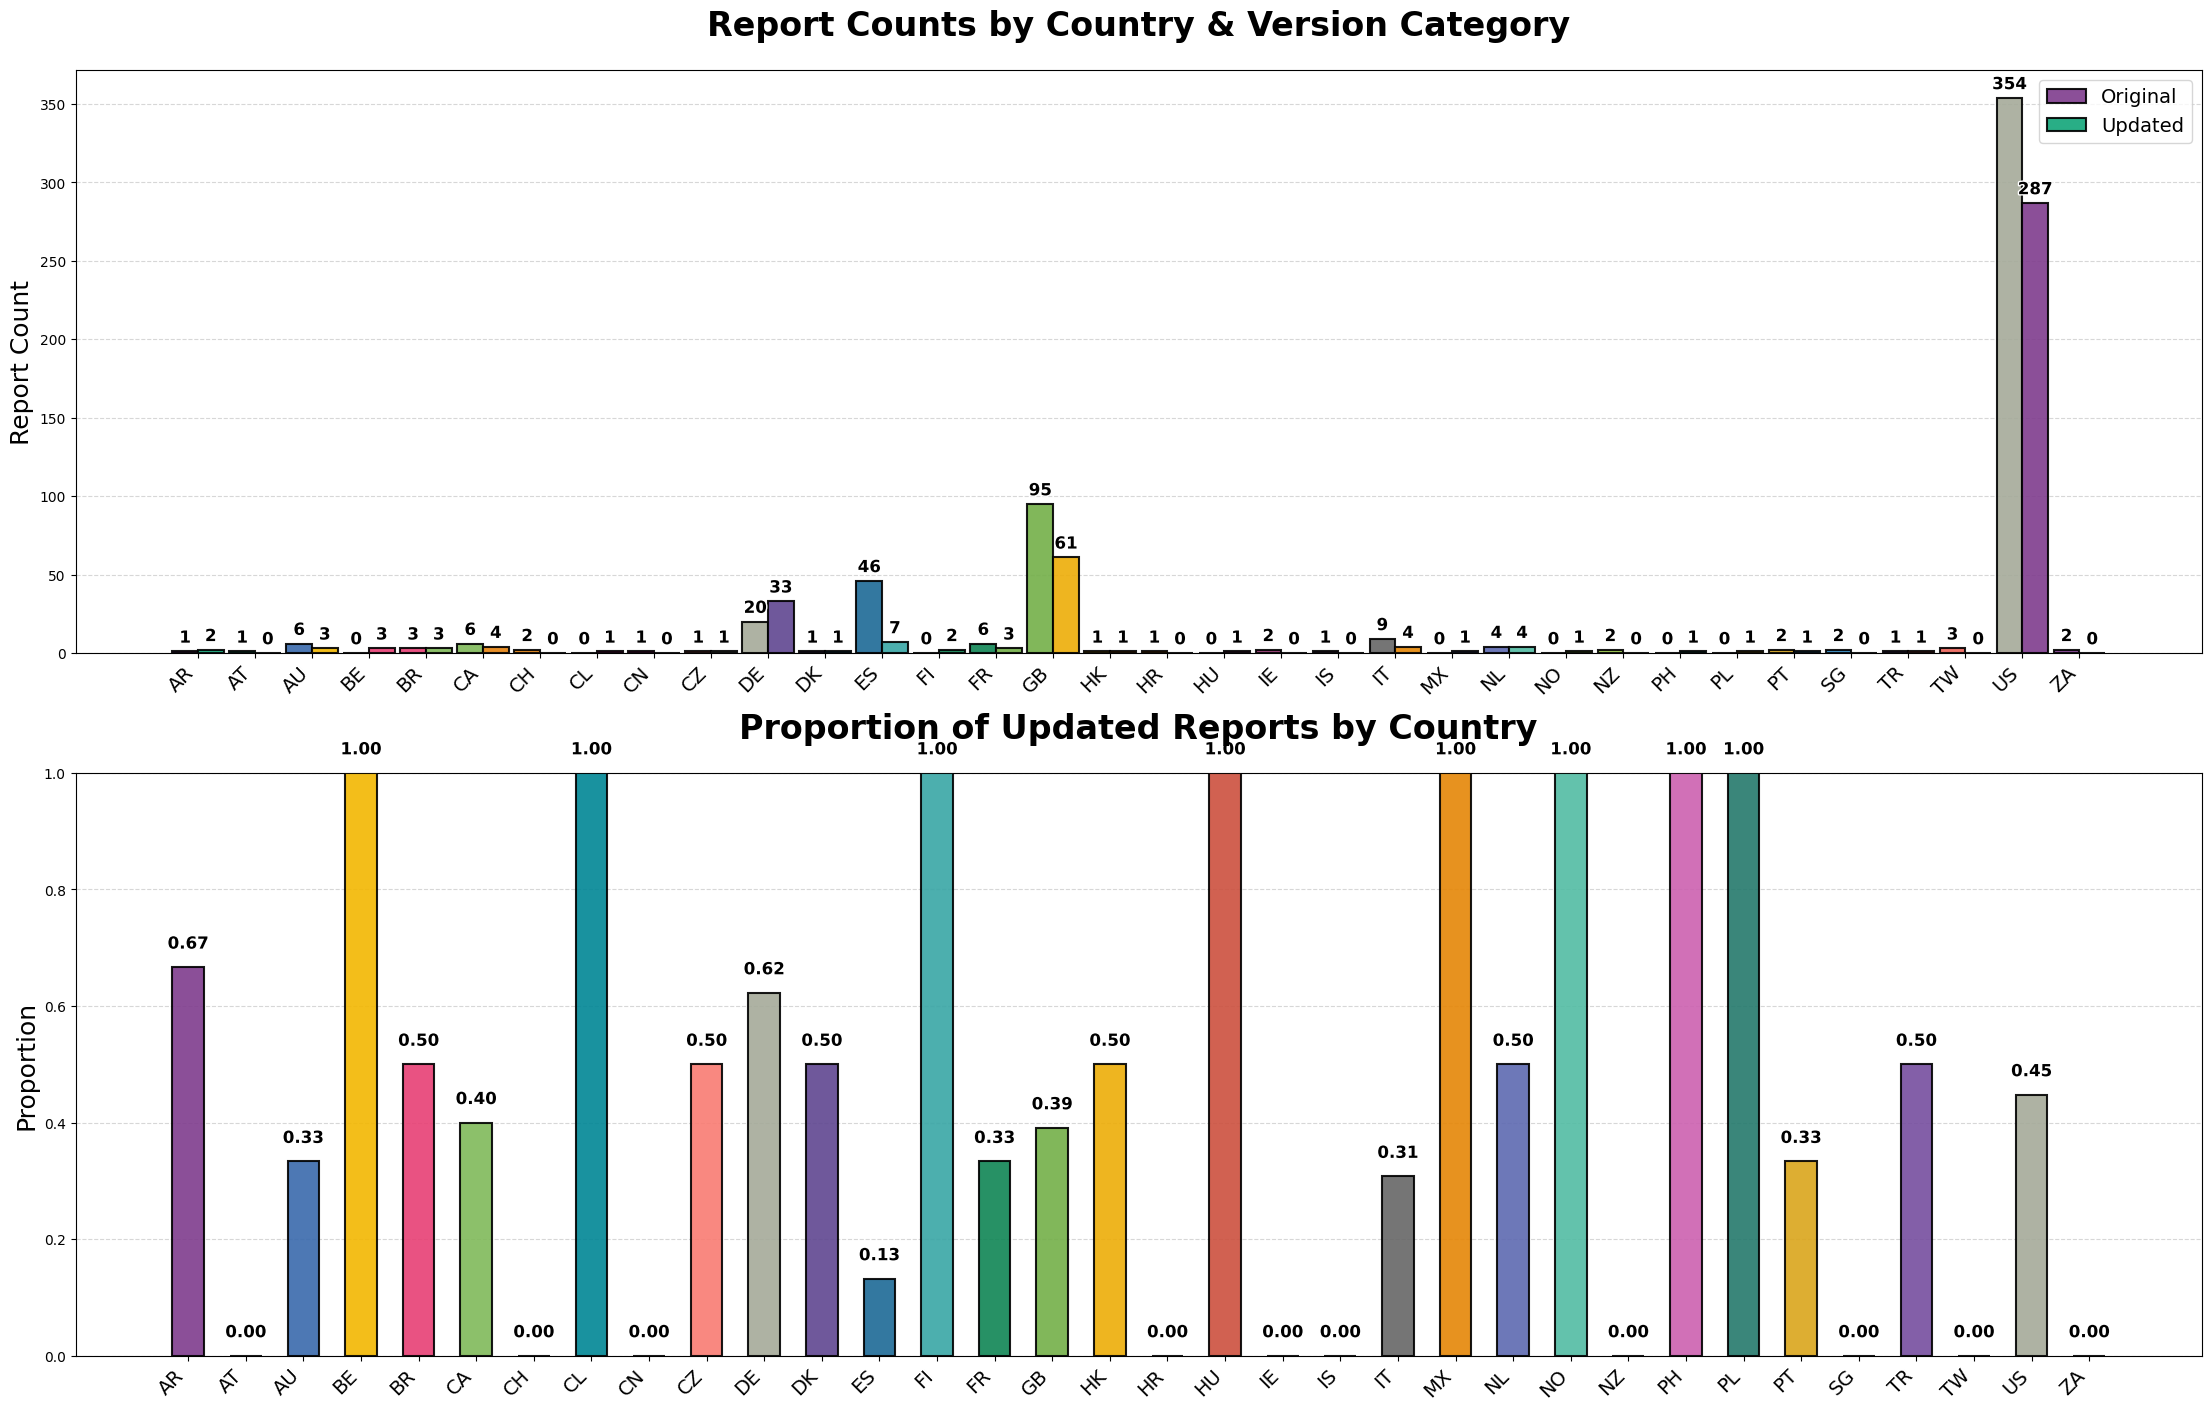

In [15]:
# Original Plotly palette
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

# Convert 'rgb(R, G, B)' to hex
def rgb_to_hex(rgb_str):
    nums = [int(x) for x in rgb_str.strip('rgb()').split(',')]
    return '#{:02x}{:02x}{:02x}'.format(*nums)

mpl_palette = [rgb_to_hex(c) for c in plotly_palette]

# Prepare data
countries = summary_table.index.tolist()
original_counts = summary_table['Original'].values
updated_counts = summary_table['Updated'].values
update_props = summary_table['update_prop'].values

# Bar width and positions
bar_width = 0.45
x = np.arange(len(countries))

# Create figure
fig, axes = plt.subplots(2, 1, figsize=(22, 14), constrained_layout=True)

# Row 1: Counts of Original vs Updated
for i in range(len(countries)):
    axes[0].bar(x[i] - bar_width/2, original_counts[i], width=bar_width,
                color=mpl_palette[i % len(mpl_palette)], edgecolor='black', alpha=0.9,
                linewidth=1.5, zorder=3)
    axes[0].bar(x[i] + bar_width/2, updated_counts[i], width=bar_width,
                color=mpl_palette[(i+len(countries)) % len(mpl_palette)], edgecolor='black', alpha=0.9,
                linewidth=1.5, zorder=3)

axes[0].set_title('Report Counts by Country & Version Category', fontsize=24, fontweight='bold', pad=25)
axes[0].set_ylabel('Report Count', fontsize=18)
axes[0].set_xticks(x)
axes[0].set_xticklabels(countries, rotation=45, ha='right', fontsize=14, fontweight='medium')
axes[0].legend(['Original', 'Updated'], fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Add value labels with shadow effect
for i in range(len(countries)):
    txt = axes[0].text(x[i] - bar_width/2, original_counts[i] + 3, str(original_counts[i]),
                       ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])
    txt = axes[0].text(x[i] + bar_width/2, updated_counts[i] + 3, str(updated_counts[i]),
                       ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

# Proportion of Updated Reports
bars = axes[1].bar(x, update_props, width=0.55,
                   color=[mpl_palette[i % len(mpl_palette)] for i in range(len(countries))],
                   edgecolor='black', alpha=0.9, linewidth=1.5, zorder=3)
axes[1].set_title('Proportion of Updated Reports by Country', fontsize=24, fontweight='bold', pad=25)
axes[1].set_ylabel('Proportion', fontsize=18)
axes[1].set_xticks(x)
axes[1].set_xticklabels(countries, rotation=45, ha='right', fontsize=14, fontweight='medium')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Add value labels on top
for i in range(len(countries)):
    txt = axes[1].text(x[i], update_props[i] + 0.025, f"{update_props[i]:.2f}",
                       ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

plt.show()


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Report Version Statistics Analysis by Country</p>


In [16]:
# Group by country and calculate statistics
version_stats_by_country = df.groupby('primarysourcecountry')['safetyreportversion_num'].agg(
    ['min', 'max', 'mean', 'median', 'count']
).sort_values(by='count', ascending=False)

# Reset the index
version_stats_by_country = version_stats_by_country.reset_index()

# Display the DataFrame
print("Safety Report Version Statistics by Country:\n")
display(version_stats_by_country)

top_country = version_stats_by_country.loc[version_stats_by_country['count'].idxmax(), 'primarysourcecountry']
max_version_country = version_stats_by_country.loc[version_stats_by_country['max'].idxmax(), 'primarysourcecountry']

print(f"\nTop country by number of reports: {top_country}")
print(f"Country with highest report version: {max_version_country}")


Safety Report Version Statistics by Country:



,primarysourcecountry,min,max,mean,median,count
0,US,1.0,12.0,1.831513,1.0,641
1,GB,1.0,9.0,2.019231,1.0,156
2,ES,1.0,5.0,1.264151,1.0,53
3,DE,1.0,9.0,2.301887,2.0,53
4,IT,1.0,3.0,1.384615,1.0,13
5,CA,1.0,3.0,1.500000,1.0,10
6,AU,1.0,2.0,1.333333,1.0,9
7,FR,1.0,2.0,1.333333,1.0,9
8,NL,1.0,6.0,2.625000,2.0,8
9,BR,1.0,4.0,1.833333,1.5,6



Top country by number of reports: US
Country with highest report version: BE


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Report Version Distribution by Country Visualization</p>


In [17]:
fig = px.box(
    df,
    x='primarysourcecountry',
    y='safetyreportversion_num',
    color='primarysourcecountry',  # optional, similar to palette
    title='Box Plot of Report Versions by Top Countries',
    labels={'primarysourcecountry': 'Country', 'safetyreportversion_num': 'Version'}
)

fig.update_layout(
    xaxis_tickangle=45,
    showlegend=False,
    width=900,
    height=600
)

fig.show()


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Report Version vs. Report ID by Country Visualization</p>


In [18]:
custom_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

# Create bubble chart
fig = px.scatter(
    df,
    x='safetyreportid_num',
    y='safetyreportversion_num',
    size='safetyreportversion_num',  
    color='primarysourcecountry',
    title='Bubble Chart of Report ID vs. Version Colored by Country',
    labels={
        'safetyreportid_num': 'Report ID',
        'safetyreportversion_num': 'Version',
        'primarysourcecountry': 'Country'
    },
    opacity=0.7,
    color_discrete_sequence=custom_palette,
    size_max=25 
)

fig.update_layout(
    legend_title_text='Country',
    legend=dict(x=1.05, y=1),
    width=1000,
    height=600
)

fig.show()


### **Safety Report Versions:**
- The reports are categorized into two types such as: Original and Updated.
- There are 573 Original reports present in this Dataset
- There are 427 Updated reports present in this Dataset
- By analyzing this Dataset it is identified taht most reports are original, but a significant number have been updated, which indicates ongoing monitoring and reporting of adverse events.
Safety Report IDs
- The safety report IDs range present in this Dataset are from 10,003,301 to 10,113,524, which shows a large span of reports.
- The average ID is about 10,053,327, and a median of 10,051,802. This suggests that most reports are relatively recent.
### **Country Analysis:**
- The United States has the highest number of reports, with 641 entries. This indicates that the U.S has a comprehensive reporting system for drug-related adverse events.
- Other countries such as Great Britain have 156 reports and Spain has 53 reports, but fewer than the U.S.
### **Report Versions by Country:**
- In countries such as Belgium, all reports are updated, which suggests proper monitoring.
- while Austria has no updated reports, wjhich indicates that the data may not be as actively refreshed there.
### **Seriousness of Reports:**
- This dataset tells whether the adverse events were serious. Hence, The distribution of serious and non-serious reports can provide insights into potential risks associated with ibuprofen.
### **Update Proportions:**
- The proportion of reports have been updated and varies significantly by country:
- Belgium shows a 100% update rate, which means all reports have been revised.
- The Countries such as Spain has low update proportion of 13%, which suggest fewer revisions or follow-ups.

- Hence, The average report version varies by country:
- The U.S. has an average version of 1.83, which indicating most reports are original reports.
- Belgium has highest average version of 6.33, which reflects a trend of frequent updates or revisions of safety reports.

# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Transform Date Strings to Datetime for insightful Analysis</p>


In [19]:
# Convert date columns from string (format: YYYYMMDD) to datetime format
df['transmissiondate'] = pd.to_datetime(df['transmissiondate'], format='%Y%m%d', errors='coerce')
df['receivedate'] = pd.to_datetime(df['receivedate'], format='%Y%m%d', errors='coerce')
df['receiptdate'] = pd.to_datetime(df['receiptdate'], format='%Y%m%d', errors='coerce')

# Display the first few rows of the converted date columns to verify results
print("Display transmissiondate,receivedate & receiptdate columns:")
display(df[['transmissiondate', 'receivedate', 'receiptdate']].head(10))


Display transmissiondate,receivedate & receiptdate columns:


,transmissiondate,receivedate,receiptdate
0,2014-10-02,2014-02-28,2014-02-28
1,2014-12-12,2014-03-12,2014-04-08
2,2014-10-02,2014-03-12,2014-03-12
3,2014-12-12,2014-03-12,2014-05-22
4,2014-12-12,2014-03-12,2014-06-11
5,2014-10-02,2014-03-12,2014-03-12
6,2014-10-02,2014-03-12,2014-03-12
7,2014-10-02,2014-03-12,2014-03-12
8,2014-10-02,2014-03-12,2014-03-17
9,2014-10-02,2014-03-12,2014-03-12


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Reports per month & Proportion of serious reports by year Analysis</p>


In [20]:
# Extract Year and Month from 'receivedate' for trend analysis
df['report_year'] = df['receivedate'].dt.year
df['report_month'] = df['receivedate'].dt.to_period('M')

# Proportion of serious reports by year
# "serious" is considered True if value is '1' or 'Y'
serious_by_year = (
    df.groupby('report_year')['serious']
    .apply(lambda x: (x.isin(['1', 'Y'])).mean())
)

print("Proportion of serious reports by year")
print(serious_by_year)
print('-'*30)
# Number of reports received per month
reports_per_month = (
    df.groupby('report_month')
    .size()
    .reset_index(name='report_count')  # clean column name
)

print("\nReports per month Analysis:")
print(reports_per_month.head(10))  # show first 10 months


Proportion of serious reports by year
report_year
2013    0.0
2014    0.0
Name: serious, dtype: float64
------------------------------

Reports per month Analysis:
  report_month  report_count
0      2013-11             1
1      2013-12             1
2      2014-01             1
3      2014-02             7
4      2014-03           460
5      2014-04           530


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Trend of Reports Received Per Month Visualization</p>


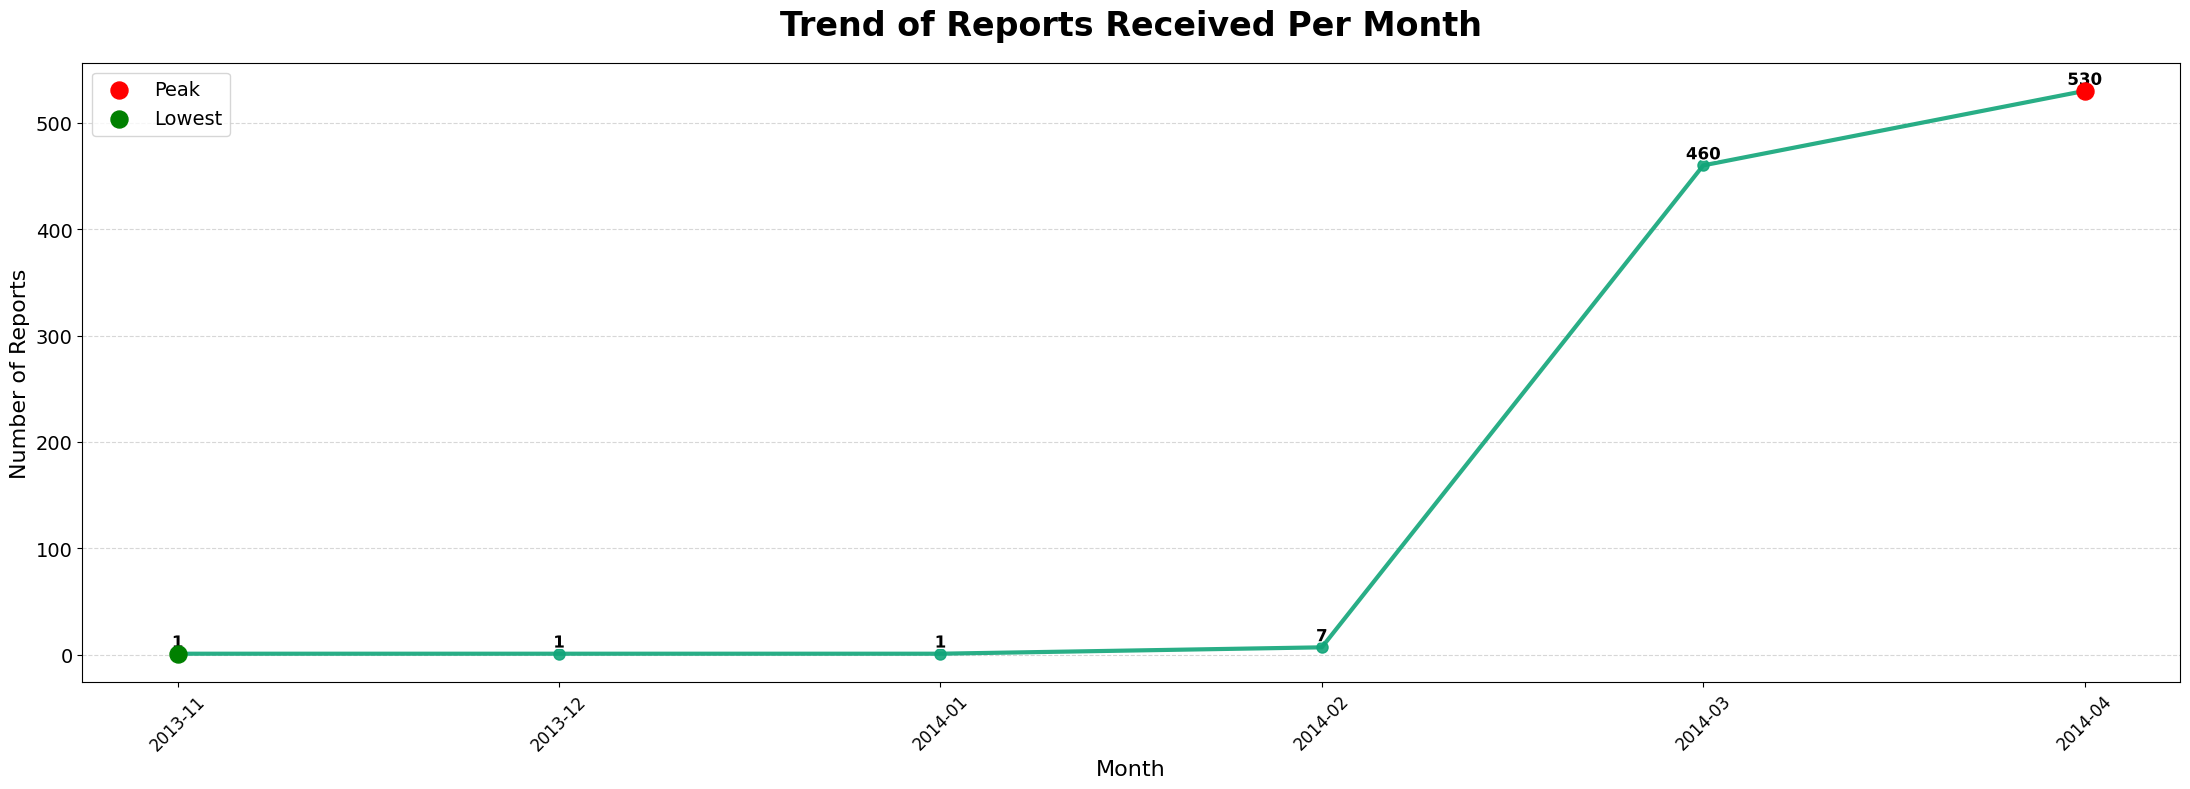

In [21]:
# Convert Plotly palette to hex
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid
def rgb_to_hex(rgb_str):
    nums = [int(x) for x in rgb_str.strip('rgb()').split(',')]
    return '#{:02x}{:02x}{:02x}'.format(*nums)
mpl_palette = [rgb_to_hex(c) for c in plotly_palette]

# Prepare data
months = reports_per_month['report_month'].astype(str)
report_counts = reports_per_month['report_count'].values

# Create figure
plt.figure(figsize=(22, 8))

plt.plot(months, report_counts, marker='o', linestyle='-', linewidth=3, markersize=8,
         color=mpl_palette[1], zorder=3, alpha=0.9)

plt.title('Trend of Reports Received Per Month', fontsize=24, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Reports', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# months with highest and lowest reports
max_idx = report_counts.argmax()
min_idx = report_counts.argmin()
plt.scatter(months[max_idx], report_counts[max_idx], color='red', s=150, zorder=4, label='Peak')
plt.scatter(months[min_idx], report_counts[min_idx], color='green', s=150, zorder=4, label='Lowest')
plt.legend(fontsize=14)

# Add value labels on the line
for x, y in zip(months, report_counts):
    txt = plt.text(x, y + 2, str(y), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

plt.tight_layout()
plt.show()


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Map and Analyze Distribution of Patient Gender</p>


In [22]:
# Map numerical codes to meaningful labels
gender_mapping = {0: 'Male', 1: 'Female', 2: 'Unknown'}
df['patient_gender'] = df['patient_patientsex'].map(gender_mapping)

# Check distribution
gender_counts = df['patient_gender'].value_counts(dropna=False, normalize=True)
print("Patient gender distribution:\n", gender_counts)


Patient gender distribution:
 patient_gender
Unknown    0.627
Female     0.304
Male       0.069
Name: proportion, dtype: float64


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Report Type & Serious Flag Distribution Analysis</p>


In [23]:
# Count frequency of each report type
report_type_counts = df['reporttype'].value_counts().reset_index()
report_type_counts.columns = ['report_type', 'count']

# Count frequency of serious flag
serious_counts = df['serious'].value_counts().reset_index()
serious_counts.columns = ['serious_flag', 'count']

# Display the results
print("Report Type Frequency Counts:")
print(report_type_counts)
print('-' * 50)
print("Serious Flag Frequency Counts:")
print(serious_counts)


Report Type Frequency Counts:
   report_type  count
0          1.0    857
1          2.0    123
2          3.0     20
--------------------------------------------------
Serious Flag Frequency Counts:
   serious_flag  count
0           1.0    774
1           2.0    226


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Gender Distribution & Seriousness Proportion Analysis</p>


In [24]:
# Patient gender distribution
gender_distribution = df['patient_gender'].value_counts(normalize=True)

# Cross-tab: serious proportion by gender
gender_serious_crosstab = pd.crosstab(df['patient_gender'], df['serious'], normalize='index')

print("Patient gender distribution:\n", gender_distribution)
print('-'*50)
print("Seriousness proportion by gender:\n", gender_serious_crosstab)


Patient gender distribution:
 patient_gender
Unknown    0.627
Female     0.304
Male       0.069
Name: proportion, dtype: float64
--------------------------------------------------
Seriousness proportion by gender:
 serious              1.0       2.0
patient_gender                    
Female          0.848684  0.151316
Male            0.942029  0.057971
Unknown         0.719298  0.280702


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Gender Distribution and Report Visualization</p>


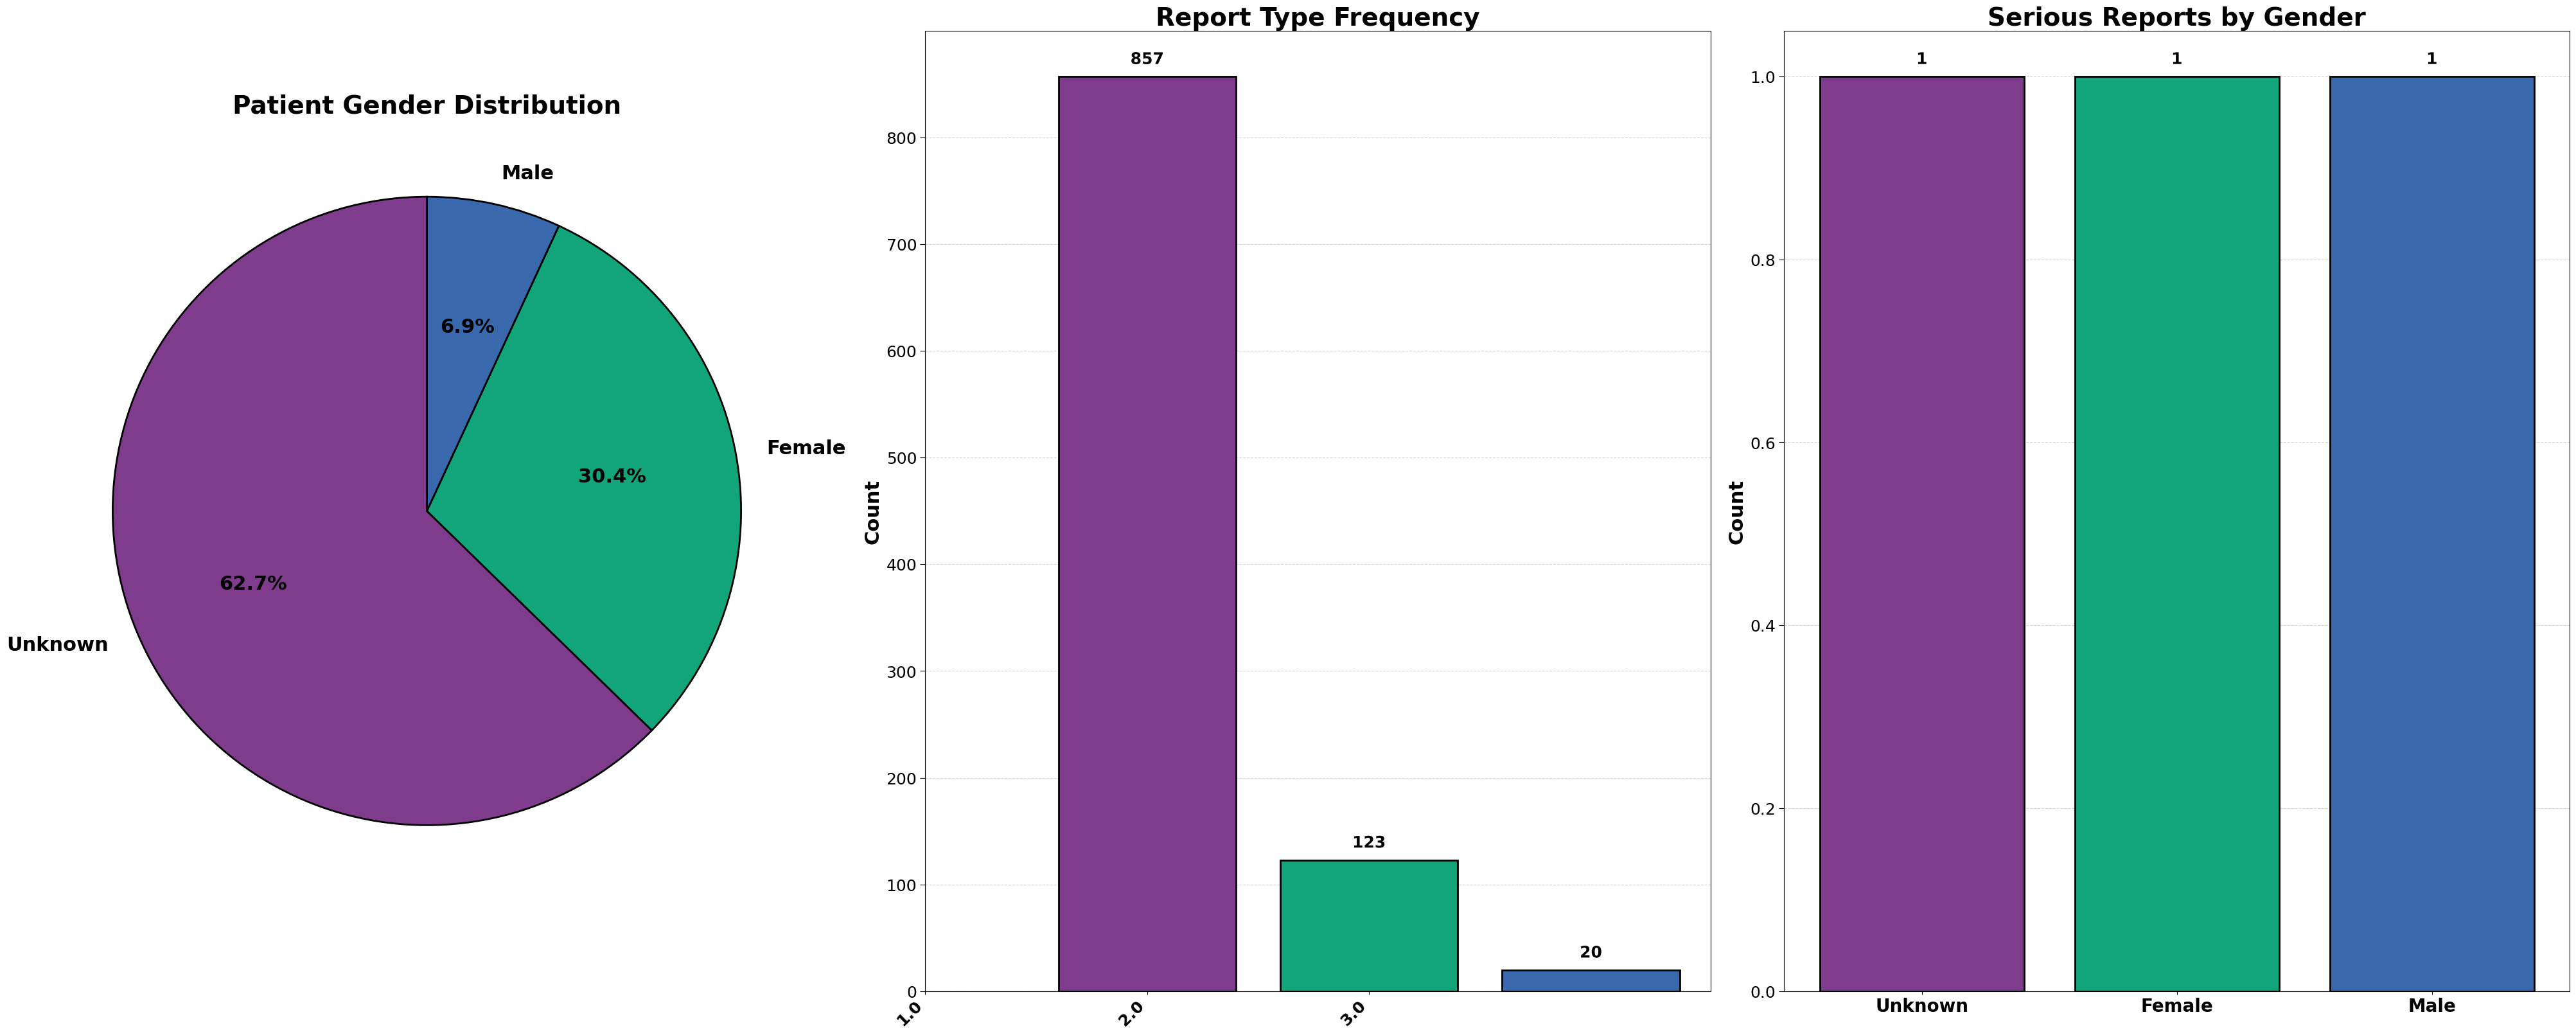

In [25]:
# Original Plotly palette
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

# Convert Plotly RGB strings to hex
def rgb_to_hex(c):
    if c.startswith('rgb'):
        nums = [int(x) for x in c.strip('rgb()').split(',')]
        return '#{:02x}{:02x}{:02x}'.format(*nums)
    return c

mpl_palette = [rgb_to_hex(c) for c in plotly_palette]

# Prepare data
genders = gender_distribution.index.tolist()
gender_vals = gender_distribution.values

report_types = report_type_counts['report_type'].tolist()
report_counts_vals = report_type_counts['count'].values

serious_flags = gender_serious_crosstab.columns.tolist()
gender_serious_vals = gender_serious_crosstab.values
serious_totals = gender_serious_vals.sum(axis=1)

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(40, 16), constrained_layout=True)

# Gender Distribution Pie Chart
axes[0].pie(
    gender_vals,
    labels=genders,
    autopct='%1.1f%%',
    startangle=90,
    colors=mpl_palette[:len(genders)],
    wedgeprops={'edgecolor':'black', 'linewidth':2},
    textprops={'fontsize':22, 'fontweight':'bold'}
)
axes[0].set_title('Patient Gender Distribution', fontsize=28, fontweight='bold')

# Report Type Bar Chart
bars1 = axes[1].bar(
    report_types,
    report_counts_vals,
    color=mpl_palette[:len(report_types)],
    edgecolor='black',
    linewidth=2,
    zorder=3
)
axes[1].set_title('Report Type Frequency', fontsize=28, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=22, fontweight='bold')
axes[1].set_xticks(range(len(report_types)))
axes[1].set_xticklabels(report_types, rotation=45, ha='right', fontsize=18, fontweight='bold')
axes[1].tick_params(axis='y', labelsize=18, length=6)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels above bars
for bar in bars1:
    height = bar.get_height()
    txt = axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height + max(report_counts_vals)*0.01,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=18, fontweight='bold', color='black'
    )
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

# Serious Reports by Gender
bars2 = axes[2].bar(
    genders,
    serious_totals,
    color=mpl_palette[:len(genders)],
    edgecolor='black',
    linewidth=2,
    zorder=3
)
axes[2].set_title('Serious Reports by Gender', fontsize=28, fontweight='bold')
axes[2].set_ylabel('Count', fontsize=22, fontweight='bold')
axes[2].set_xticks(range(len(genders)))
axes[2].set_xticklabels(genders, fontsize=20, fontweight='bold')
axes[2].tick_params(axis='y', labelsize=18, length=6)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels above bars
for bar in bars2:
    height = bar.get_height()
    txt = axes[2].text(
        bar.get_x() + bar.get_width()/2,
        height + max(serious_totals)*0.01,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=18, fontweight='bold', color='black'
    )
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

plt.show()


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Analyze the Report Date & Delay Statistics</p>


In [26]:
date_stats = df[['transmissiondate', 'receivedate', 'receiptdate']].agg({
    'transmissiondate': ['min', 'max'],
    'receivedate': ['min', 'max'],
    'receiptdate': ['min', 'max']
})
print("Date Columns Statistics (Min & Max):\n")
display(date_stats)
print('-'* 50)
df['receive_receipt_delay'] = (df['receivedate'] - df['receiptdate']).dt.days
df['transmit_receive_delay'] = (df['transmissiondate'] - df['receivedate']).dt.days
delay_stats = df[['receive_receipt_delay', 'transmit_receive_delay']].agg(['min', 'max', 'mean'])
print("Reporting Delay Statistics (days):\n", delay_stats)

Date Columns Statistics (Min & Max):



,transmissiondate,receivedate,receiptdate
min,2014-10-02,2013-11-26,2014-01-03
max,2025-04-09,2014-04-25,2025-03-07


--------------------------------------------------
Reporting Delay Statistics (days):
       receive_receipt_delay  transmit_receive_delay
min               -3993.000                 185.000
max                   0.000                4026.000
mean                -99.157                 308.461


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Analyze the Report Type vs Seriousness & Delays</p>


In [27]:
# Crosstab of Report Type vs. Seriousness
report_serious_cross = pd.crosstab(df['reporttype'], df['serious'], normalize='index').reset_index()
# Rename columns for clarity
report_serious_cross.columns.name = None  # Remove the crosstab column group name
report_serious_cross.columns = ['report_type'] + [f'serious_{col}' for col in report_serious_cross.columns[1:]]

print("Crosstab of Report Type vs. Seriousness:")
display(report_serious_cross)

print('-' * 50)

# Delay Statistics by Report Type
delay_by_type = df.groupby('reporttype')[['receive_receipt_delay', 'transmit_receive_delay']].agg(['min', 'max', 'mean'])

# Flatten MultiIndex columns
delay_by_type.columns = [f'{col[0]}_{col[1]}' for col in delay_by_type.columns]
delay_by_type = delay_by_type.reset_index()  # Move 'reporttype' back as a column

print("Delay Statistics by Report Type:")
display(delay_by_type)

print('-' * 50)
# Analysis by Year and Report Type, Extract year from receivedate
df['report_year'] = df['receivedate'].dt.year

# Group by year and report type, fill missing with 0
reports_by_year_type = df.groupby(['report_year', 'reporttype']).size().unstack(fill_value=0).reset_index()

# Optional: rename columns for clarity
reports_by_year_type.columns.name = None

print("Reports by Year and Report Type:")
print(reports_by_year_type)



Crosstab of Report Type vs. Seriousness:


,report_type,serious_1.0,serious_2.0
0,1.0,0.744457,0.255543
1,2.0,0.943089,0.056911
2,3.0,1.000000,0.000000


--------------------------------------------------
Delay Statistics by Report Type:


,reporttype,receive_receipt_delay_min,receive_receipt_delay_max,receive_receipt_delay_mean,transmit_receive_delay_min,transmit_receive_delay_max,transmit_receive_delay_mean
0,1.0,-3993,0,-85.463244,185,4026,294.488915
1,2.0,-2038,0,-210.138211,185,2394,417.772358
2,3.0,-54,0,-3.400000,191,268,234.900000


--------------------------------------------------
Reports by Year and Report Type:
   report_year  1.0  2.0  3.0
0         2013    1    1    0
1         2014  856  122   20


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Frequency Analysis of Key Categories</p>


In [28]:
# Dictionary of categorical columns to analyze
categorical_counts = {
    'Fulfill Expedite Criteria': df['fulfillexpeditecriteria'].value_counts(),
    'Duplicate': df['duplicate'].value_counts(),
    'Reporter Qualification': df['primarysource_qualification'].value_counts(),
    'Sender Type': df['sender_sendertype'].value_counts(),
    'Receiver Type': df['receiver_receivertype'].value_counts()
}

# Loop through each categorical column, convert to DataFrame, and display top 10 counts
for key, value in categorical_counts.items():
    # Convert Series to DataFrame and rename columns
    df_counts = value.head(10).reset_index()
    df_counts.columns = [key, 'count']
    
    print(f"{key} Frequency Counts:")
    print(df_counts)  
    print('-' * 50)


Fulfill Expedite Criteria Frequency Counts:
   Fulfill Expedite Criteria  count
0                        1.0    624
1                        2.0    376
--------------------------------------------------
Duplicate Frequency Counts:
   Duplicate  count
0        1.0   1000
--------------------------------------------------
Reporter Qualification Frequency Counts:
   Reporter Qualification  count
0                     5.0    363
1                     3.0    325
2                     1.0    244
3                     2.0     49
4                     4.0     19
--------------------------------------------------
Sender Type Frequency Counts:
   Sender Type  count
0          2.0    999
1          6.0      1
--------------------------------------------------
Receiver Type Frequency Counts:
   Receiver Type  count
0            6.0   1000
--------------------------------------------------


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Report Trends and Delay Visualization</p>


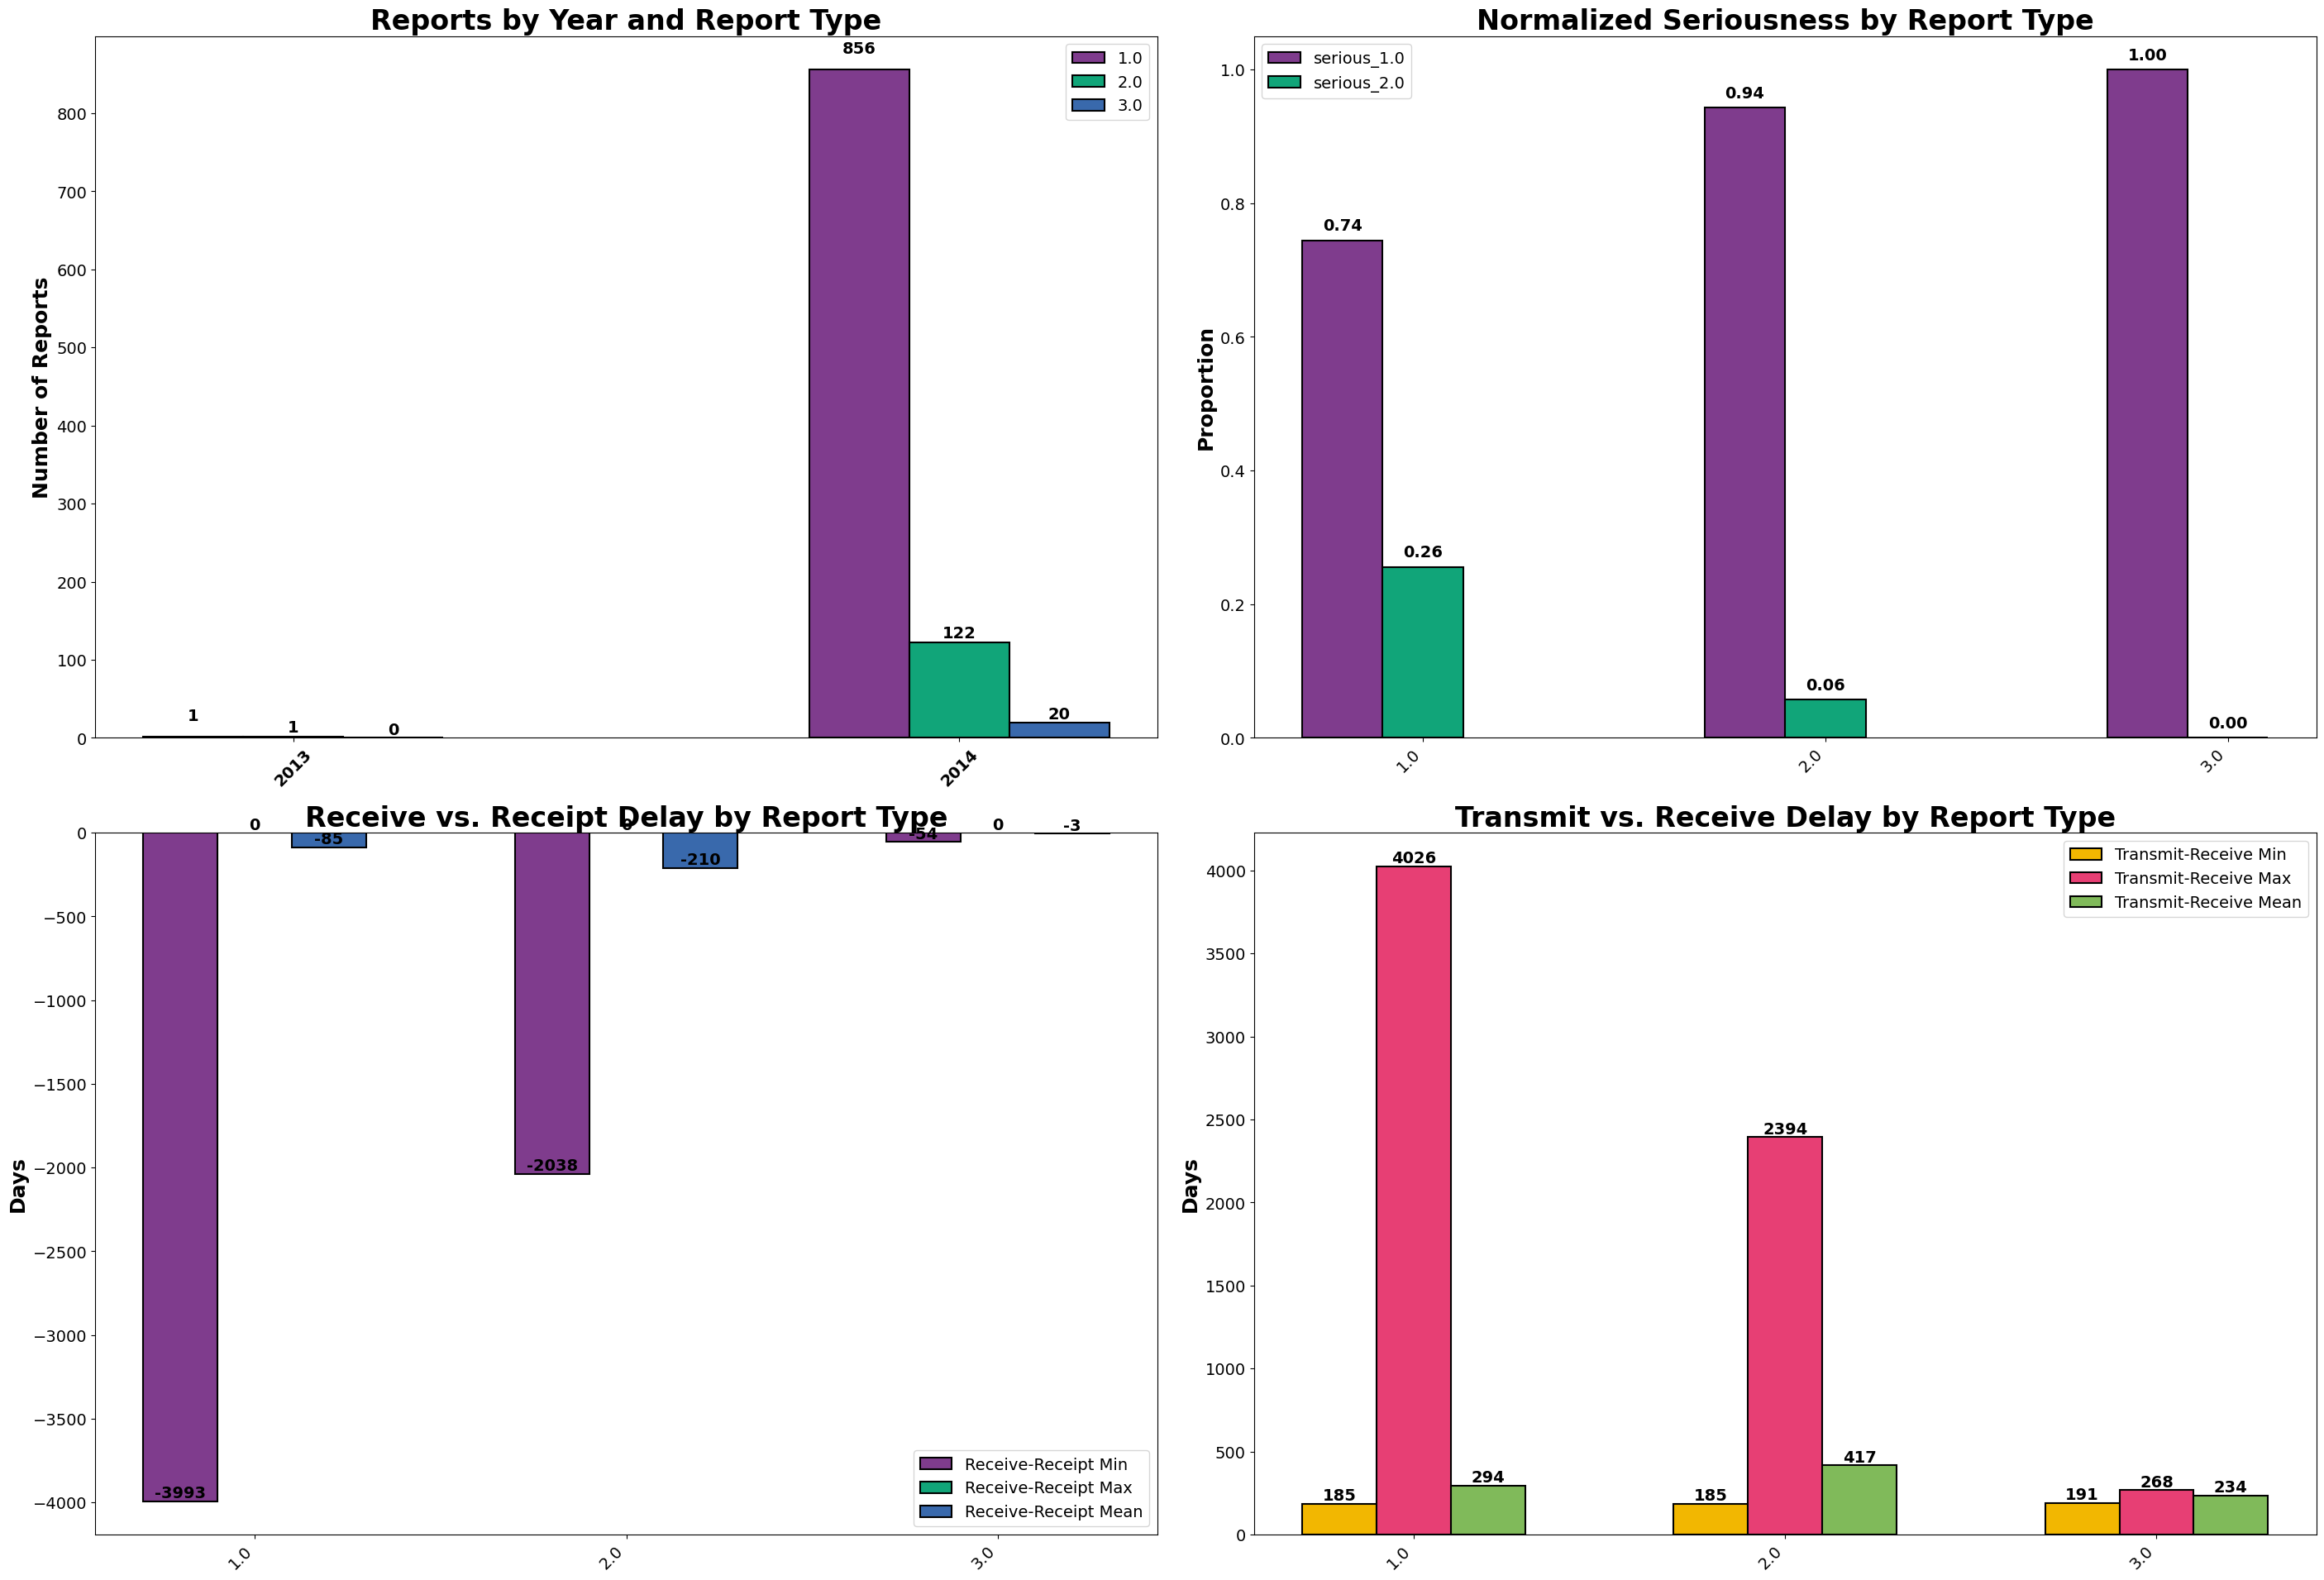

In [29]:
# Use original Plotly palette
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

# Convert RGB to hex if needed
def rgb_to_hex(c):
    if c.startswith('rgb'):
        nums = [int(x) for x in c.strip('rgb()').split(',')]
        return '#{:02x}{:02x}{:02x}'.format(*nums)
    return c

mpl_palette = [rgb_to_hex(c) for c in plotly_palette]

# Prepare Data
years = reports_by_year_type['report_year'].tolist()
report_types = reports_by_year_type.columns[1:].tolist()
year_report_vals = reports_by_year_type[report_types].values

serious_cols = [col for col in report_serious_cross.columns if col != 'report_type']
serious_vals = report_serious_cross[serious_cols].values
report_type_labels = report_serious_cross['report_type'].tolist()

receive_delay_stats = delay_by_type[['receive_receipt_delay_min', 'receive_receipt_delay_max', 'receive_receipt_delay_mean']].values
transmit_delay_stats = delay_by_type[['transmit_receive_delay_min', 'transmit_receive_delay_max', 'transmit_receive_delay_mean']].values
delay_labels = delay_by_type['reporttype'].tolist()

# Create figure subplots
fig, axes = plt.subplots(2, 2, figsize=(28, 19), constrained_layout=True)

# Reports by Year and Report Type
for idx, report_type in enumerate(report_types):
    axes[0,0].bar(
        [y + idx*0.15 for y in range(len(years))],
        reports_by_year_type[report_type],
        width=0.15,
        color=mpl_palette[idx % len(mpl_palette)],
        edgecolor='black',
        linewidth=1.5,
        label=report_type
    )
    # Value labels above bars
    for x, y in zip([y + idx*0.15 for y in range(len(years))], reports_by_year_type[report_type]):
        axes[0,0].text(x, y + max(reports_by_year_type[report_type])*0.02, str(y),
                       ha='center', va='bottom', fontsize=14, fontweight='bold')

axes[0,0].set_title('Reports by Year and Report Type', fontsize=24, fontweight='bold')
axes[0,0].set_xticks([i + 0.15 for i in range(len(years))])
axes[0,0].set_xticklabels(years, fontsize=14, fontweight='bold', rotation=45)
axes[0,0].set_ylabel('Number of Reports', fontsize=18, fontweight='bold')
axes[0,0].tick_params(axis='y', labelsize=14)
axes[0,0].legend(fontsize=14)

# Seriousness by Report Type
x = np.arange(len(report_type_labels))
width = 0.2
for idx, col in enumerate(serious_cols):
    axes[0,1].bar(
        x + idx*width,
        report_serious_cross[col],
        width=width,
        color=mpl_palette[idx % len(mpl_palette)],
        edgecolor='black',
        linewidth=1.5,
        label=col
    )
    # Value labels above bars
    for xi, yi in zip(x + idx*width, report_serious_cross[col]):
        axes[0,1].text(xi, yi + 0.01, f"{yi:.2f}", ha='center', va='bottom',
                       fontsize=14, fontweight='bold')

axes[0,1].set_title('Normalized Seriousness by Report Type', fontsize=24, fontweight='bold')
axes[0,1].set_xticks(x + width)
axes[0,1].set_xticklabels(report_type_labels, rotation=45, ha='right', fontsize=14)
axes[0,1].set_ylabel('Proportion', fontsize=18, fontweight='bold')
axes[0,1].tick_params(axis='y', labelsize=14)
axes[0,1].legend(fontsize=14)

# Receive vs Receipt Delay Stats
width = 0.2
for idx, col in enumerate(['Min', 'Max', 'Mean']):
    axes[1,0].bar(
        x + idx*width,
        receive_delay_stats[:, idx],
        width=width,
        color=mpl_palette[idx % len(mpl_palette)],
        edgecolor='black',
        linewidth=1.5,
        label=f'Receive-Receipt {col}'
    )
    for xi, yi in zip(x + idx*width, receive_delay_stats[:, idx]):
        axes[1,0].text(xi, yi + 0.5, str(int(yi)), ha='center', va='bottom',
                       fontsize=14, fontweight='bold')

axes[1,0].set_title('Receive vs. Receipt Delay by Report Type', fontsize=24, fontweight='bold')
axes[1,0].set_xticks(x + width)
axes[1,0].set_xticklabels(delay_labels, rotation=45, ha='right', fontsize=14)
axes[1,0].set_ylabel('Days', fontsize=18, fontweight='bold')
axes[1,0].tick_params(axis='y', labelsize=14)
axes[1,0].legend(fontsize=14)

# Transmit vs Receive Delay Stats
for idx, col in enumerate(['Min', 'Max', 'Mean']):
    axes[1,1].bar(
        x + idx*width,
        transmit_delay_stats[:, idx],
        width=width,
        color=mpl_palette[(idx+3) % len(mpl_palette)],
        edgecolor='black',
        linewidth=1.5,
        label=f'Transmit-Receive {col}'
    )
    for xi, yi in zip(x + idx*width, transmit_delay_stats[:, idx]):
        axes[1,1].text(xi, yi + 0.5, str(int(yi)), ha='center', va='bottom',
                       fontsize=14, fontweight='bold')

axes[1,1].set_title('Transmit vs. Receive Delay by Report Type', fontsize=24, fontweight='bold')
axes[1,1].set_xticks(x + width)
axes[1,1].set_xticklabels(delay_labels, rotation=45, ha='right', fontsize=14)
axes[1,1].set_ylabel('Days', fontsize=18, fontweight='bold')
axes[1,1].tick_params(axis='y', labelsize=14)
axes[1,1].legend(fontsize=14)

plt.show()


### **Transmission date Analysis:**
- By analyzing this Dataset, it is determined that the transmission date of reports ranges October 2, 2014, to April 9, 2025.
- The received date ranges according to this Dataset is from November 26, 2013 to April 25, 2014.
- The receipt date ranges are from January 3, 2014 to March 7, 2025 which is determined by analyzing thsi Dataset.
### **Reporting Delays:**
- On an average, there is a delay of about 99 days in between receiving and processing the report.
- The maximum delay in receiving the report is 3993 days, which indicates some reports have significant discrepancies in timing.
### **Seriousness of Reports:**
- The dataset shows that 0% of reports were classified as serious in both 2013 and also in 2014.
- Majority of reports of about 77.4% fall under report type 1.0, which indicates they are primarily routine reports with fewer serious events.
### **Monthly Reporting Trends:**
- In 2014, there is a notable spike in reports:
- 7 reports in February, 460 reports in March & 530 reports in April
- This suggests that reporting increased in early 2014, and possibly due to awareness or changes in reporting practices.
### **Gender Distribution of Patients:**
- The majority of patients reported are Unknown gender of about 62.7%.
- Females account 30.4% and Males 6.9%. This indicates a lack identification in many reports.
### **Seriousness by Gender:**
- Among females, 84.8% of reports are serious, while 94.2% of male reports are serious. This suggests that male patients, when reported,have more serious outcomes.
### **Report Type Frequency:**
- Most reports are categorized as Type 1 of about 857 reports, while Type 2 and Type 3 have fewer reports of about 123 and 20, respectively.
- This distribution indicates that most reported events are routine, and serious cases are less common.
### **Fulfillment of Expedite Criteria:**
- A significant number of reports shows 624 out of 1000 met the expedite criteria, which indicates urgency in reporting.
### **Duplicate Reports:**
- There are no duplicate reports in the dataset, which suggests thoroughness in the data entry process.
### **Reporter and Sender Information:**
- Most reporters have a qualification rated as 5.0 in 363 reports, which indicates a high level of expertise or experience.
- The sender type predominantly classified as 2.0 in 999 reports, which indicates a specific category of sender involved in the reporting process.


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Top Sender & Receiver Organizations Analysis</p>


In [30]:
sender_org_counts = df['sender_senderorganization'].value_counts()
receiver_org_counts = df['receiver_receiverorganization'].value_counts()
print("Top Sender Organizations:\n", sender_org_counts)
print('-' * 50)
print("Top Receiver Organizations:\n", receiver_org_counts)

Top Sender Organizations:
 sender_senderorganization
FDA-Public Use    999
SANOFI AVENTIS      1
Name: count, dtype: int64
--------------------------------------------------
Top Receiver Organizations:
 receiver_receiverorganization
FDA    1000
Name: count, dtype: int64


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Sender Types and Duplicate Analysis</p>


In [31]:
expedite_sender_cross = pd.crosstab(df['sender_sendertype'], df['fulfillexpeditecriteria'], normalize='index')
print("Normalized Crosstab of Sender Type vs. Expedite Criteria:\n", expedite_sender_cross)
print('-' * 50)
top_countries = df['primarysource_reportercountry'].value_counts().head(10).index
duplicate_country_cross = pd.crosstab(df[df['primarysource_reportercountry'].isin(top_countries)]['primarysource_reportercountry'], 
                                     df['duplicate'], normalize='index')
print("Crosstab of Reporter Country vs. Duplicate:\n", duplicate_country_cross)
print('-' * 50)
duplicate_source_counts = df['reportduplicate_duplicatesource'].value_counts().head(10)
duplicate_numb_unique = df['reportduplicate_duplicatenumb'].nunique()
print("Duplicate Source Frequency Counts:\n", duplicate_source_counts)
print('-' * 50)
print("Unique Duplicate Numbers:", duplicate_numb_unique)

Normalized Crosstab of Sender Type vs. Expedite Criteria:
 fulfillexpeditecriteria       1.0       2.0
sender_sendertype                          
2.0                      0.623624  0.376376
6.0                      1.000000  0.000000
--------------------------------------------------
Crosstab of Reporter Country vs. Duplicate:
 duplicate                      1.0
primarysource_reportercountry     
AU                             1.0
CA                             1.0
COUNTRY NOT SPECIFIED          1.0
DE                             1.0
ES                             1.0
FR                             1.0
GB                             1.0
IT                             1.0
NL                             1.0
US                             1.0
--------------------------------------------------
Duplicate Source Frequency Counts:
 reportduplicate_duplicatesource
PFIZER      159
BAYER        98
NOVARTIS     70
BIOGEN       53
AVENTIS      39
BANNER       38
ACTAVIS      33
MCNEIL       31
JA

# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Sender Organization & Receiver Type Analysis</p>


In [32]:
company_by_sender = df.groupby('sender_senderorganization')['companynumb'].nunique()
company_by_sender = company_by_sender[sender_org_counts.index]
print("Unique Company Numbers by Top Sender Organizations:\n", company_by_sender)
print('-' * 50)
sender_receiver_cross = pd.crosstab(df['sender_sendertype'], df['receiver_receivertype'], normalize='index')
print("Crosstab of Sender Type vs. Receiver Type:\n", sender_receiver_cross)

Unique Company Numbers by Top Sender Organizations:
 sender_senderorganization
FDA-Public Use    962
SANOFI AVENTIS      1
Name: companynumb, dtype: int64
--------------------------------------------------
Crosstab of Sender Type vs. Receiver Type:
 receiver_receivertype  6.0
sender_sendertype         
2.0                    1.0
6.0                    1.0


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Most Common Reactions Analysis</p>


In [33]:
df['patient_reaction'] = df['patient_reaction'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded_reactions = df.explode('patient_reaction')

# Extract 'reactionmeddrapt' from each reaction dict
df_exploded_reactions['reaction_name'] = df_exploded_reactions['patient_reaction'].apply(
    lambda x: x.get('reactionmeddrapt') if isinstance(x, dict) else None
)

reaction_counts = df_exploded_reactions['reaction_name'].value_counts().head(10)

print("Top Reactions:")
display(reaction_counts.reset_index().rename(columns={'index':'reaction_name', 'reaction_name':'count'}))

print('-'*50)

df['patient_drug'] = df['patient_drug'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded_drugs = df.explode('patient_drug')

df_exploded_drugs['drug_name'] = df_exploded_drugs['patient_drug'].apply(
    lambda x: x.get('medicinalproduct') if isinstance(x, dict) else None
)

drug_counts = df_exploded_drugs['drug_name'].value_counts().head(10)

print("Top Patient Drugs:")
print(drug_counts.reset_index().rename(columns={'index':'drug_name', 'drug_name':'count'}))


Top Reactions:


,count,count
0,Pain,82
1,Drug interaction,70
2,Drug ineffective,56
3,Vomiting,56
4,Nausea,50
5,Headache,46
6,Deep vein thrombosis,45
7,Fatigue,43
8,Angioedema,43
9,Injury,42


--------------------------------------------------
Top Patient Drugs:
         count  count
0    IBUPROFEN    688
1   IBUPROFEN.    173
2  PARACETAMOL     83
3   OMEPRAZOLE     67
4    TECFIDERA     58
5          YAZ     57
6   PREDNISONE     53
7      ELIQUIS     53
8   OMALIZUMAB     53
9      ASPIRIN     50


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Sender Organization and Duplicate Visualization</p>


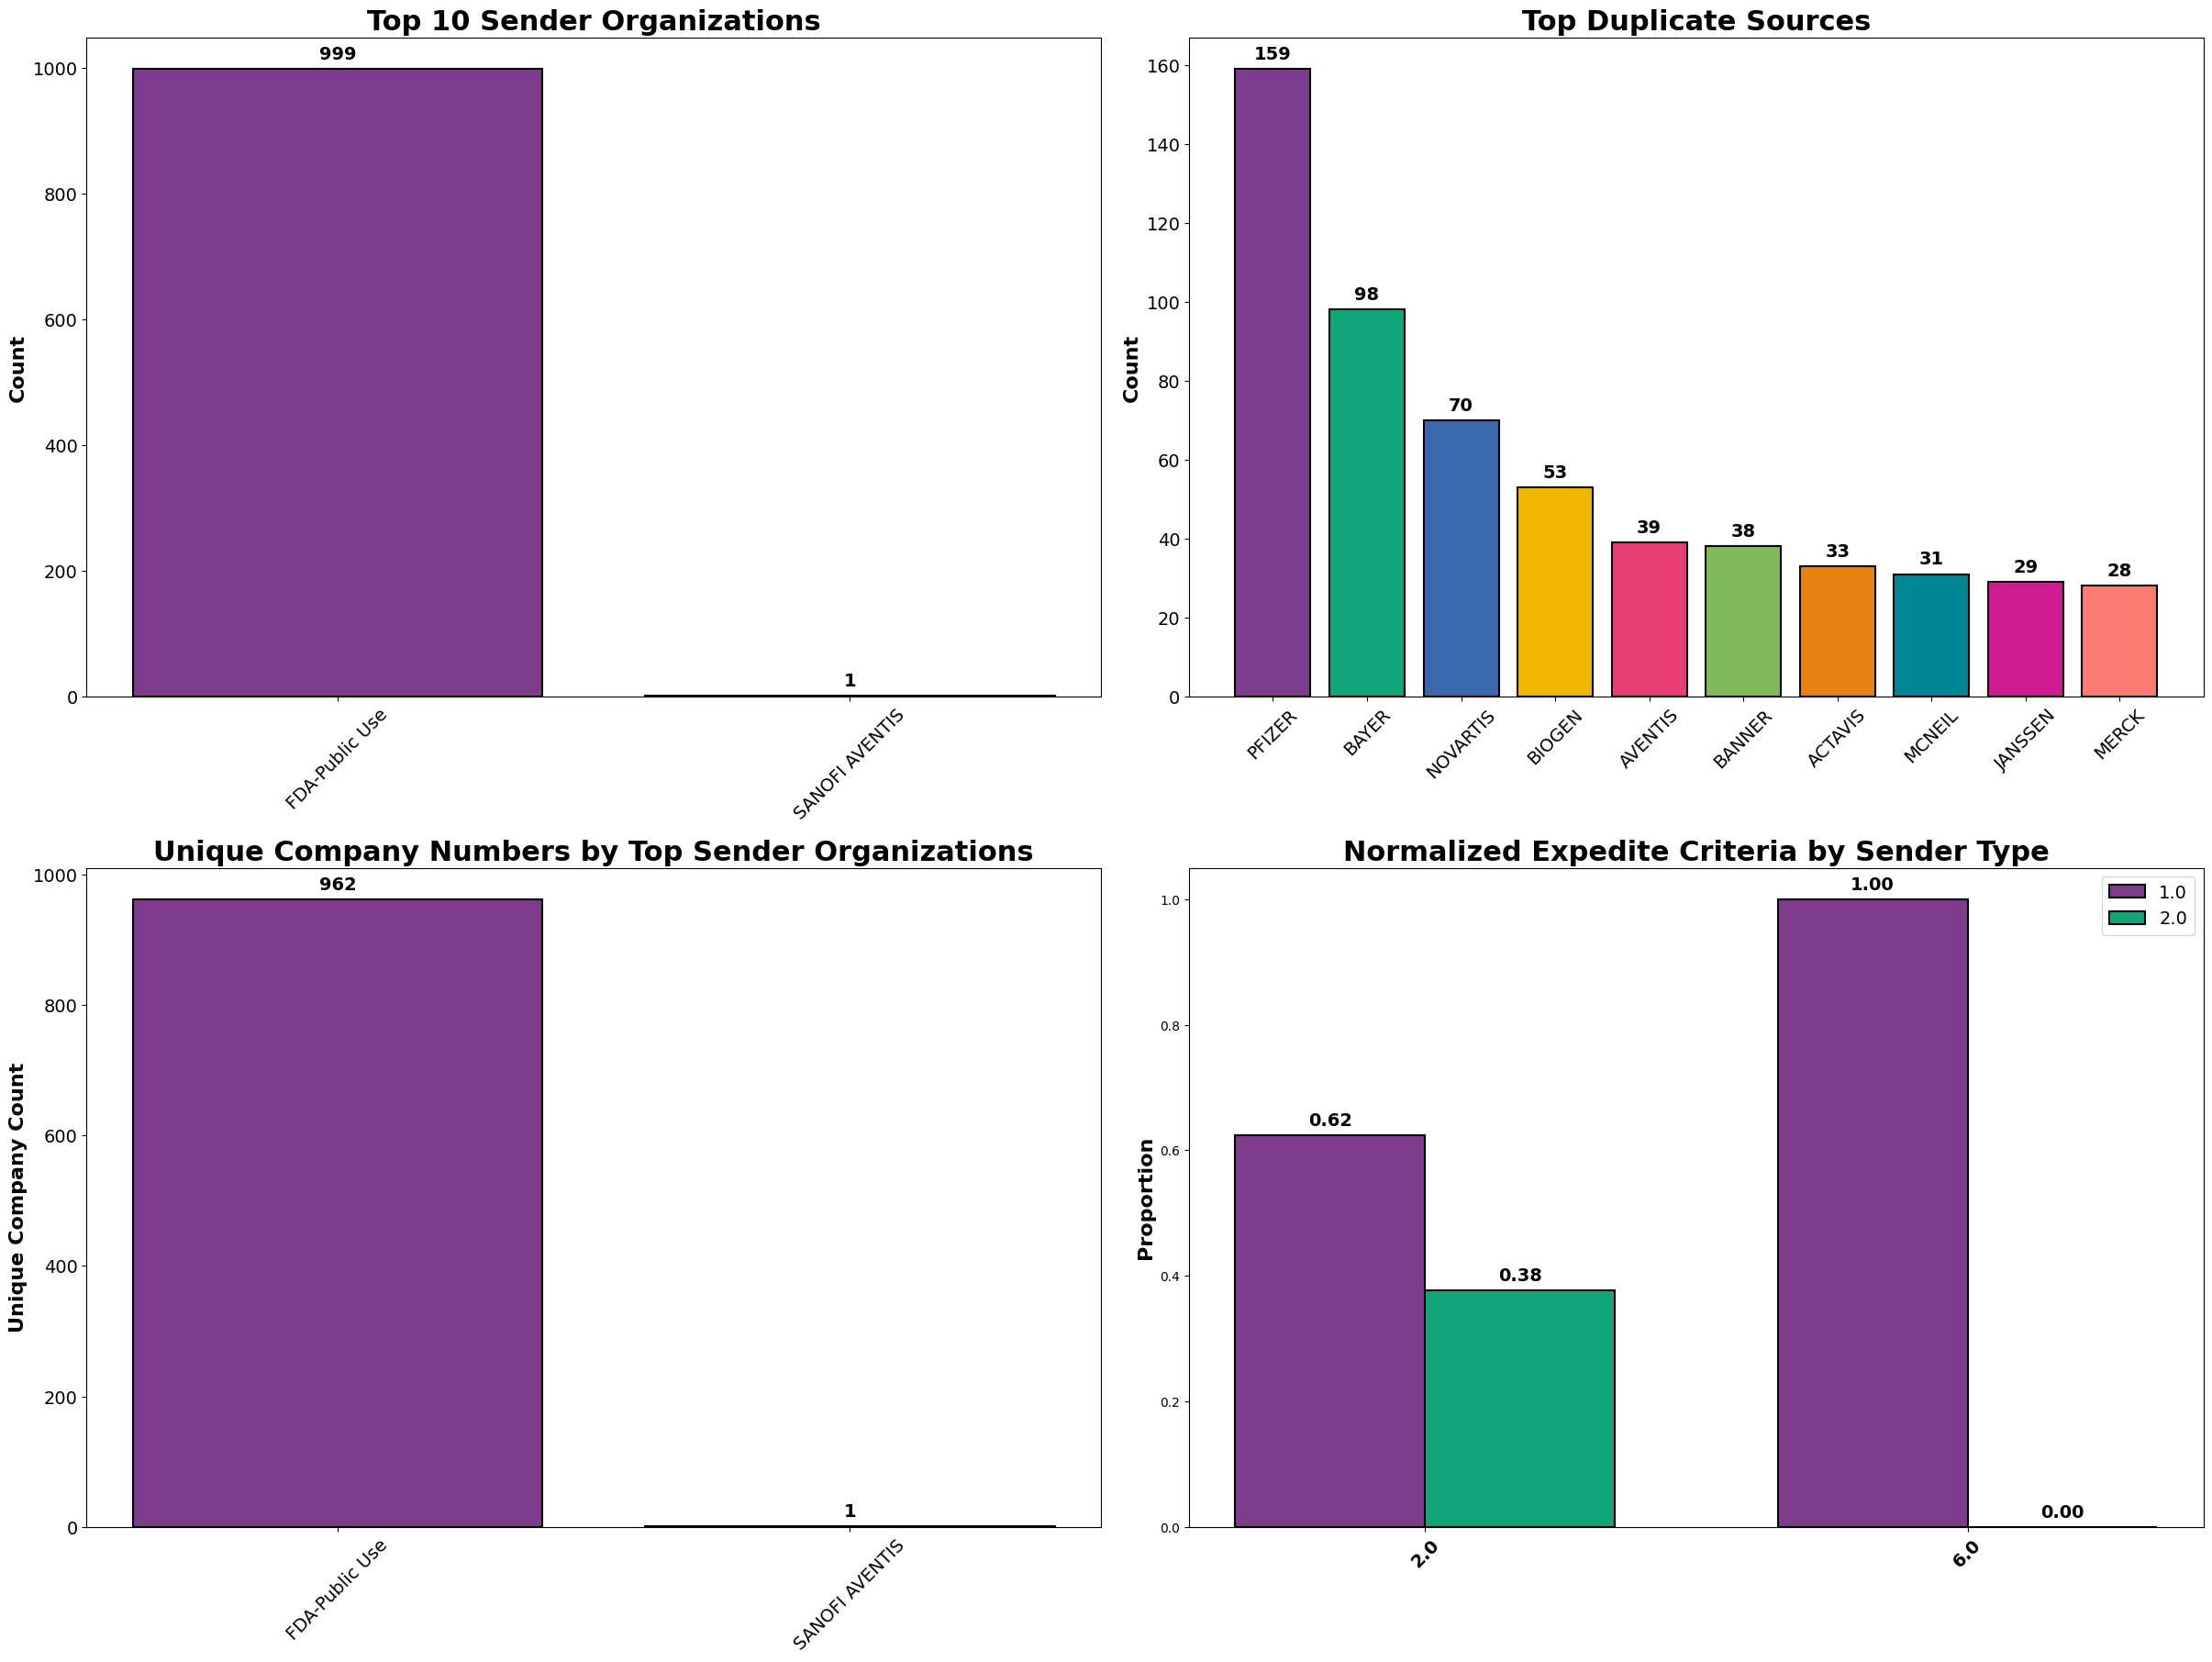

In [34]:
# Plotly color palette
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid
def rgb_to_hex(c):
    if c.startswith('rgb'):
        nums = [int(x) for x in c.strip('rgb()').split(',')]
        return '#{:02x}{:02x}{:02x}'.format(*nums)
    return c
colors = [rgb_to_hex(c) for c in plotly_palette]

# Prepare Data
top_senders = sender_org_counts.head(10)
duplicate_sources = duplicate_source_counts.head(10)
top_companies = company_by_sender.head(10)
expedite_labels = expedite_sender_cross.index.tolist()
expedite_vals = expedite_sender_cross.values

# Create subplots 
fig, axes = plt.subplots(2, 2, figsize=(24, 18), constrained_layout=True)

# 1. Top Sender Organizations
axes[0,0].bar(top_senders.index, top_senders.values, color=colors[:len(top_senders)], edgecolor='black', linewidth=1.5)
axes[0,0].set_title('Top 10 Sender Organizations', fontsize=22, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=16, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0,0].tick_params(axis='y', labelsize=14)
for i, v in enumerate(top_senders.values):
    axes[0,0].text(i, v + max(top_senders.values)*0.01, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Top Duplicate Sources
axes[0,1].bar(duplicate_sources.index, duplicate_sources.values, color=colors[:len(duplicate_sources)], edgecolor='black', linewidth=1.5)
axes[0,1].set_title('Top Duplicate Sources', fontsize=22, fontweight='bold')
axes[0,1].set_ylabel('Count', fontsize=16, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=14)
axes[0,1].tick_params(axis='y', labelsize=14)
for i, v in enumerate(duplicate_sources.values):
    axes[0,1].text(i, v + max(duplicate_sources.values)*0.01, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Unique Company Numbers by Sender Organization
axes[1,0].bar(top_companies.index, top_companies.values, color=colors[:len(top_companies)], edgecolor='black', linewidth=1.5)
axes[1,0].set_title('Unique Company Numbers by Top Sender Organizations', fontsize=22, fontweight='bold')
axes[1,0].set_ylabel('Unique Company Count', fontsize=16, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=14)
axes[1,0].tick_params(axis='y', labelsize=14)
for i, v in enumerate(top_companies.values):
    axes[1,0].text(i, v + max(top_companies.values)*0.01, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

#  Expedite Criteria by Sender Type
width = 0.35
x = np.arange(len(expedite_labels))
for idx, col in enumerate(expedite_sender_cross.columns):
    axes[1,1].bar(x + idx*width, expedite_sender_cross[col], width=width,
                  color=colors[idx % len(colors)], edgecolor='black', linewidth=1.5, label=col)
    for xi, yi in zip(x + idx*width, expedite_sender_cross[col]):
        axes[1,1].text(xi, yi + 0.01, f"{yi:.2f}", ha='center', va='bottom', fontsize=14, fontweight='bold')

axes[1,1].set_title('Normalized Expedite Criteria by Sender Type', fontsize=22, fontweight='bold')
axes[1,1].set_xticks(x + width/2)
axes[1,1].set_xticklabels(expedite_labels, rotation=45, fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Proportion', fontsize=16, fontweight='bold')
axes[1,1].legend(fontsize=14)

plt.show()


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Analyze the Patient Age by Gender & Seriousness</p>


In [35]:
# Define age unit mapping to years
unit_factors = {
    '800': 10,             # decades
    '801': 1,              # years
    '802': 1/12,           # months
    '803': 1/52.143,       # weeks
    '804': 1/365.25,       # days
    '805': 1/(365.25*24)   # hours
}

# Convert age to numeric
df['age_original'] = pd.to_numeric(df['patient_patientonsetage'], errors='coerce')

# Normalize using units 
df['age_years'] = df['age_original'] * df['patient_patientonsetageunit'].map(unit_factors)

df['age_years'] = df['age_years'].fillna(df['age_original'])

# Filter out unrealistic ages
df.loc[(df['age_years'] < 0) | (df['age_years'] > 120), 'age_years'] = pd.NA

# Inspect cleaned ages
print("Summary statistics:\n", df['age_years'].describe())
print('-'*60)

# Age statistics by gender and seriousness
age_stats_gender_serious = df.groupby(['patient_gender', 'serious'])['age_years'].agg(['mean', 'median', 'count'])
print("Age statistics by gender and seriousness:\n", age_stats_gender_serious)


Summary statistics:
 count    997.000000
mean      46.447342
std       18.547088
min        1.000000
25%       35.000000
50%       49.000000
75%       59.000000
max       90.000000
Name: age_years, dtype: float64
------------------------------------------------------------
Age statistics by gender and seriousness:
                              mean  median  count
patient_gender serious                          
Female         1.0      49.671875    52.5    256
               2.0      50.673913    51.5     46
Male           1.0      25.384615    12.0     65
               2.0      49.000000    49.0      4
Unknown        1.0      44.873614    49.0    451
               2.0      52.440000    49.0    175


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Analyze the Frequency Counts by Category</p>


In [36]:
# Prepare frequency counts for categorical variables
categorical_frequencies = {
    'Patient Gender': df['patient_gender'].value_counts(dropna=False),
    'Seriousness Hospitalization': df['seriousnesshospitalization'].value_counts(dropna=False),
    'Occurrence Country (Top 10)': df['occurcountry'].value_counts(dropna=False).head(10)  # Top 10 for brevity
}

# Print the frequency counts
for label, counts in categorical_frequencies.items():
    print(f"{label} Frequency Counts:\n{counts}\n{'-'*50}")


Patient Gender Frequency Counts:
patient_gender
Unknown    627
Female     304
Male        69
Name: count, dtype: int64
--------------------------------------------------
Seriousness Hospitalization Frequency Counts:
seriousnesshospitalization
1.002728    418
1.000000    350
1.006068      9
1.005762      6
1.011272      5
           ... 
1.000341      1
1.020181      1
1.003925      1
1.012803      1
1.004783      1
Name: count, Length: 161, dtype: int64
--------------------------------------------------
Occurrence Country (Top 10) Frequency Counts:
occurcountry
US    665
GB    142
DE     50
ES     49
IT     12
CA     10
FR      8
NL      8
AU      8
BR      5
Name: count, dtype: int64
--------------------------------------------------


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Top Reactions & Medications Visualization</p>


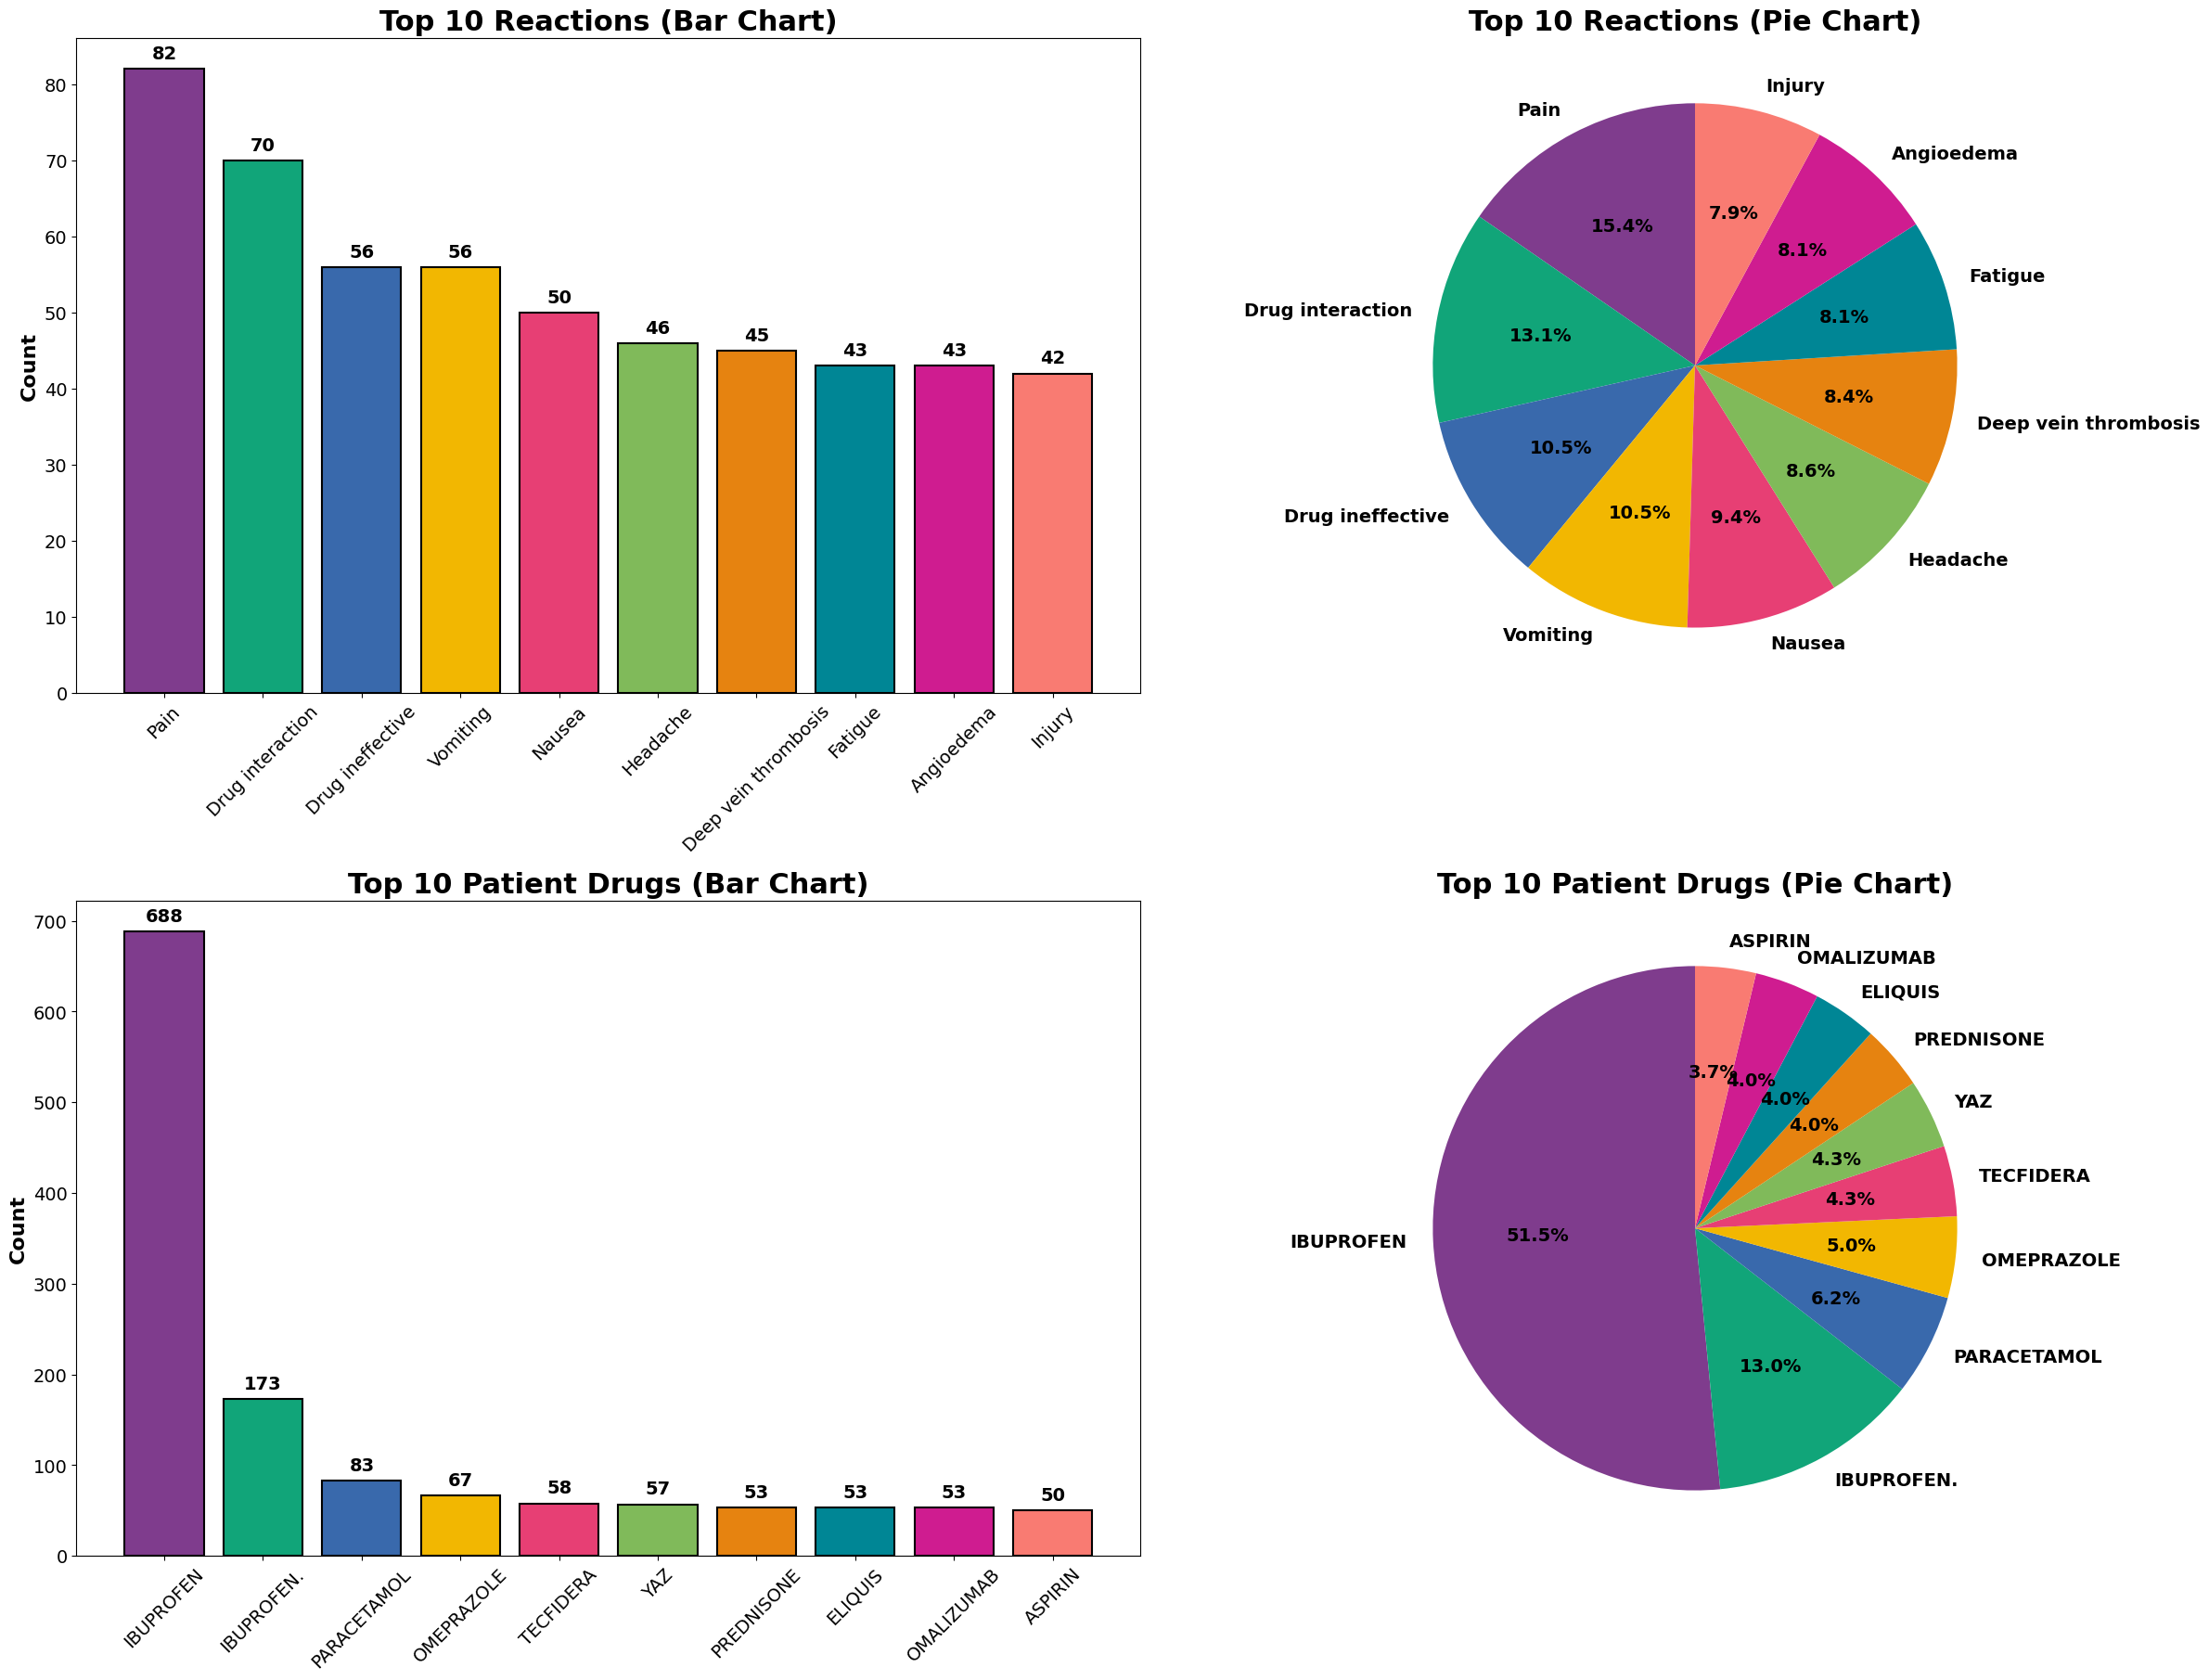

In [37]:
# Plotly color palette
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

def rgb_to_hex(c):
    if c.startswith('rgb'):
        nums = [int(x) for x in c.strip('rgb()').split(',')]
        return '#{:02x}{:02x}{:02x}'.format(*nums)
    return c

colors = [rgb_to_hex(c) for c in plotly_palette]

# Prepare Data
top_reactions = reaction_counts
top_drugs = drug_counts

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(24, 18), constrained_layout=True)

# Bar Chart Top Reactions
axes[0,0].bar(top_reactions.index, top_reactions.values, color=colors[:len(top_reactions)], edgecolor='black', linewidth=1.5)
axes[0,0].set_title('Top 10 Reactions (Bar Chart)', fontsize=22, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=16, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0,0].tick_params(axis='y', labelsize=14)
for i, v in enumerate(top_reactions.values):
    axes[0,0].text(i, v + max(top_reactions.values)*0.01, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Pie Chart Top Reactions
axes[0,1].pie(top_reactions.values, labels=top_reactions.index, autopct='%1.1f%%', colors=colors[:len(top_reactions)],
              startangle=90, textprops={'fontsize':14, 'fontweight':'bold'})
axes[0,1].set_title('Top 10 Reactions (Pie Chart)', fontsize=22, fontweight='bold')

# Bar Chart Top Drugs
axes[1,0].bar(top_drugs.index, top_drugs.values, color=colors[:len(top_drugs)], edgecolor='black', linewidth=1.5)
axes[1,0].set_title('Top 10 Patient Drugs (Bar Chart)', fontsize=22, fontweight='bold')
axes[1,0].set_ylabel('Count', fontsize=16, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=14)
axes[1,0].tick_params(axis='y', labelsize=14)
for i, v in enumerate(top_drugs.values):
    axes[1,0].text(i, v + max(top_drugs.values)*0.01, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Pie Chart Top Drugs
axes[1,1].pie(top_drugs.values, labels=top_drugs.index, autopct='%1.1f%%', colors=colors[:len(top_drugs)],
              startangle=90, textprops={'fontsize':14, 'fontweight':'bold'})
axes[1,1].set_title('Top 10 Patient Drugs (Pie Chart)', fontsize=22, fontweight='bold')

plt.show()


### **Sender and Receiver Organizations:**
- The primary sender organization is the FDA-Public Use, which indicates in about 999 reports. This suggests that the FDA plays an important role in monitoring and reporting adverse events.
- The receiver organization is the FDA, which indicates a centralized reporting system for these events.
### **Expedite Criteria by Sender Type:**
- Reports sent by type 2.0 mostly fulfill the expedite criteria of about 62.4%, while all reports from type 6.0 meet this urgency requirement. This indicates that type 6.0 senders are highly efficient in reporting many critical cases.
### **Duplicate Reports:**
- By analyzing this Dataset it indicates that all entries are marked as non-duplicate from various reporting countries, which includes AU, CA, DE, ES, FR, GB, IT, NL, US, and others. This suggests accurate data entry practices.
- The top sources of duplicate reports include major pharmaceutical companies such as Pfizer of about 159 and Bayer of about 98, which shows high activity in reporting from these organizations.
### **Company Numbers by Sender Organizations:**
- The FDA-Public Use sender organization is linked to about 962 company numbers, which indicates that it aggregates the reports from a wide range of pharmaceutical entities.
### **Reactions and Drugs:**
- The most common reported reaction is Pain with about 82 cases, followed by Drug Interaction about 70 and Vomiting of about 56. 
- IBUPROFEN most frequently reported in about 688 reports, which shows its widespread use, and followed by PARACETAMOL about 83 and others such as OMEPRAZOLE and YAZ.
### **Age Statistics:**
- The average age of patients reported around 46 years, with the oldest reported 90 years old. This suggests that the adverse events affect a wide age range, with a few number of older patients involved.
- Females tend to be older on an average around 49 years, when experiencing serious reports compared to males of around 25 years, which indicates different health dynamics between genders.
### **Patient Gender Distribution:**
- The majority of patients have an Unknown gender indicates in 627 reports, followed by 304 Females and 69 Males.High number of unknowns indicates a need for improved data collection regarding gender.
### **Seriousness of Hospitalization:**
- Majority of reports indicates hospitalization for serious events, with 418 cases marked as serious. This reflects the severity of the adverse reactions associated with ibuprofen.
### **Occurrence by Country**
- The United States has the highest number of reports of about 665, followed by 142 Great Britain and 50 Germany. This may reflect differences in reporting practices or drug use patterns across countries.

# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Patient Gender vs. Hospitalization Seriousness Analysis</p>


In [38]:
# crosstab: Patient Gender vs Hospitalization Seriousness
gender_hospitalization_crosstab = pd.crosstab(
    df['patient_gender'],
    df['seriousnesshospitalization'],
    normalize='index'
)
print("Crosstab of Patient Gender vs. Hospitalization Seriousness:\n")
display(gender_hospitalization_crosstab)


Crosstab of Patient Gender vs. Hospitalization Seriousness:



seriousnesshospitalization,0.972088,0.973674,0.979742,0.980660,0.981578,0.985772,0.986691,0.988123,0.988313,0.989088,...,1.012834,1.012987,1.014425,1.014946,1.017701,1.018249,1.020181,1.022905,1.026165,2.000000
patient_gender,,,,,,,,,,,,,,,,,,,,,
Female,0.000000,0.003289,0.000000,0.003289,0.003289,0.006579,0.000000,0.000000,0.003289,0.000000,...,0.000000,0.003289,0.003289,0.003289,0.003289,0.003289,0.000000,0.003289,0.003289,0.003289
Male,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Unknown,0.001595,0.000000,0.001595,0.000000,0.000000,0.000000,0.001595,0.001595,0.000000,0.001595,...,0.001595,0.000000,0.000000,0.000000,0.000000,0.000000,0.001595,0.000000,0.000000,0.000000


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Top Countries: Reactions & Age-Weight Correlation Analysis</p>


In [39]:
# Top occurrence countries
top_countries = df['occurcountry'].value_counts().head(10).index

# Ensure unique top reactions
top_reactions_unique = reaction_counts.index.drop_duplicates()[:10]

# Filter exploded reactions to top countries
df_reactions_top = df_exploded_reactions[df_exploded_reactions['occurcountry'].isin(top_countries)]

# Crosstab without reindexing
reaction_country_cross = pd.crosstab(
    df_reactions_top['occurcountry'],
    df_reactions_top['reaction_name'],
    normalize='index'
)

# Keep only the top 10 unique reactions 
reaction_country_cross = reaction_country_cross.loc[:, reaction_country_cross.columns.intersection(top_reactions_unique)]

print("Crosstab of Occurrence Country vs. Top Reactions:\n")
display(reaction_country_cross)
print('-'*60)

# Correlation of Age and Weight by Top Countries
df['age_years'] = pd.to_numeric(df['age_years'], errors='coerce')
df['patient_patientweight'] = pd.to_numeric(df['patient_patientweight'], errors='coerce')

corr_by_country = df[df['occurcountry'].isin(top_countries)].groupby('occurcountry').apply(
    lambda x: x[['age_years', 'patient_patientweight']].corr(method='pearson').iloc[0, 1]
)

print("Age-Weight Correlation by Top Countries:\n")
print(corr_by_country.reset_index().rename(columns={0:'age_weight_corr'}))


Crosstab of Occurrence Country vs. Top Reactions:



reaction_name,Angioedema,Deep vein thrombosis,Drug ineffective,Drug interaction,Fatigue,Headache,Injury,Nausea,Pain,Vomiting
occurcountry,,,,,,,,,,
AU,0.000000,0.000000,0.000000,0.000000,0.013158,0.013158,0.000000,0.052632,0.013158,0.039474
BR,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000
CA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027
DE,0.000000,0.000000,0.005988,0.011976,0.000000,0.000000,0.000000,0.000000,0.011976,0.000000
ES,0.476190,0.000000,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FR,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GB,0.000000,0.001656,0.000000,0.077815,0.000000,0.009934,0.000000,0.008278,0.011589,0.026490
IT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NL,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.024390,0.000000,0.024390


------------------------------------------------------------
Age-Weight Correlation by Top Countries:

  occurcountry  age_weight_corr
0           AU         0.314052
1           BR         0.053829
2           CA         0.335874
3           DE         0.180264
4           ES        -0.071752
5           FR        -0.090953
6           GB         0.368621
7           IT         0.477525
8           NL         0.422775
9           US         0.148877


# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Age and Weight statistics by gender Analysis</p>


In [40]:
# Age and Weight statistics by gender
age_weight_stats_by_gender = df.groupby('patient_gender')[['age_years', 'patient_patientweight']].agg(['min', 'max', 'mean']).reset_index()

print("Age and Weight Statistics by Gender:\n")
display(age_weight_stats_by_gender)


Age and Weight Statistics by Gender:



patient_gender age_years                  patient_patientweight              \
                       min   max       mean                   min         max   
0         Female       1.0  88.0  49.824503              0.660000  172.820000   
1           Male       4.0  80.0  26.753623             77.912396   78.007701   
2        Unknown       3.0  90.0  46.988818              3.200000  178.000000   

              
        mean  
0  80.169498  
1  77.920683  
2  76.817132

# <p style="font-family:cursive; font-size:28px; padding:24px 16px; border-radius:98px 40px 160px 8px; border-left:8px solid #ff1493; font-weight:bold; text-shadow:2px 2px 5px rgba(0,0,0,0.5); color:#ff1493; display:inline-block; font-style:italic; animation: glowing 3s infinite; background-color:#ffe6f0; width:90%; text-align:center;">Age & Weight Visualiation by Country and Gender</p>


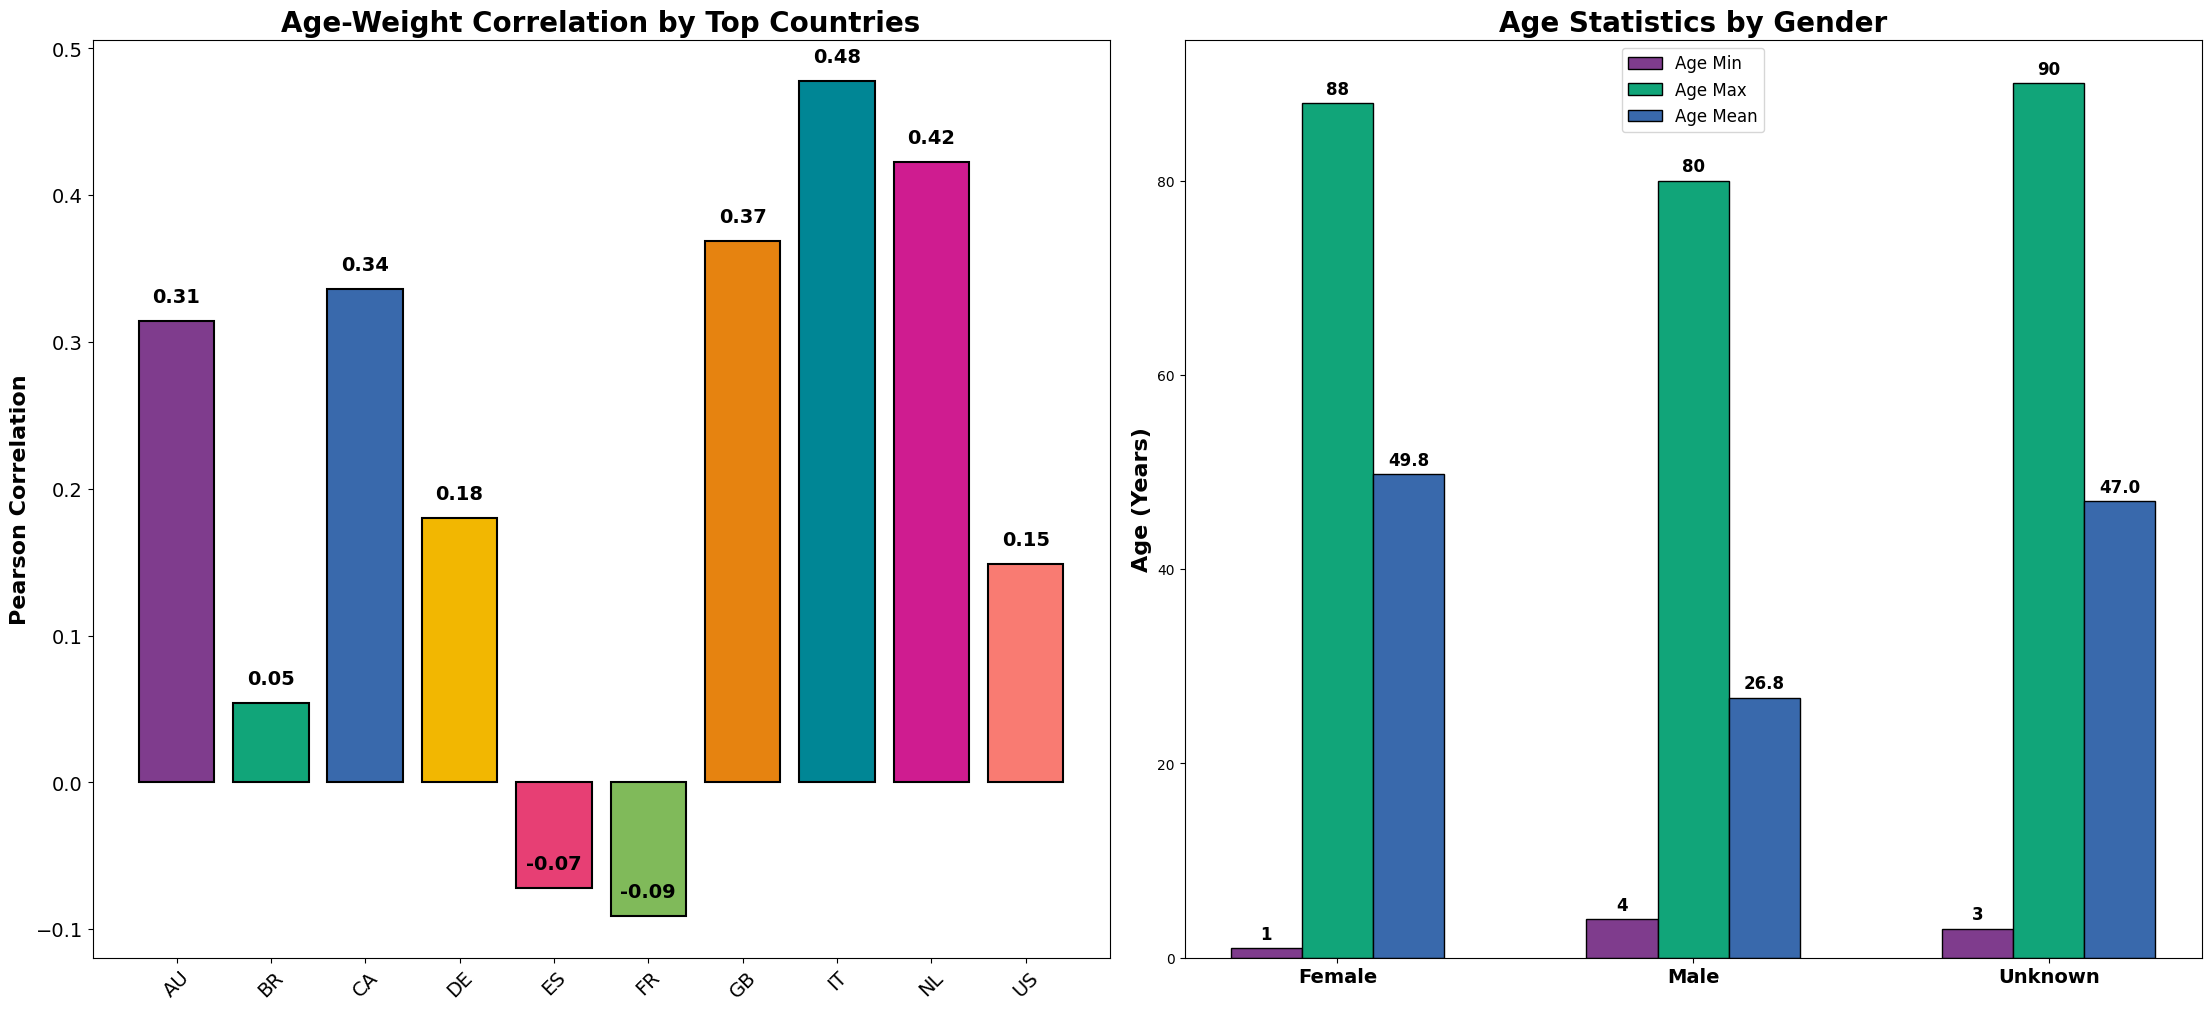

In [41]:
# Convert Plotly RGB palette to hex
plotly_palette = px.colors.qualitative.Bold + px.colors.qualitative.Prism + px.colors.qualitative.Vivid

def rgb_to_hex(c):
    if c.startswith('rgb'):
        nums = [int(x) for x in c.strip('rgb()').split(',')]
        return '#{:02x}{:02x}{:02x}'.format(*nums)
    return c

colors = [rgb_to_hex(c) for c in plotly_palette]

# Prepare Data and Determine Age-Weight correlation by top countries
corr_countries = corr_by_country.index.tolist()
corr_vals = corr_by_country.values

# Age & Weight stats by gender
stats_labels = age_weight_stats_by_gender['patient_gender'].tolist()
age_min = age_weight_stats_by_gender['age_years']['min'].tolist()
age_max = age_weight_stats_by_gender['age_years']['max'].tolist()
age_mean = age_weight_stats_by_gender['age_years']['mean'].tolist()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10), constrained_layout=True)

# 1. Age-Weight Correlation by Top Countries
axes[0].bar(corr_countries, corr_vals, color=colors[:len(corr_countries)], edgecolor='black', linewidth=1.5)
for i, v in enumerate(corr_vals):
    axes[0].text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=14, fontweight='bold')
axes[0].set_title('Age-Weight Correlation by Top Countries', fontsize=20, fontweight='bold')
axes[0].set_ylabel('Pearson Correlation', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

#  Age Statistics by Gender (min, max, mean)
width = 0.2
x = np.arange(len(stats_labels))
axes[1].bar(x - width, age_min, width=width, color=colors[0], edgecolor='black', label='Age Min')
axes[1].bar(x, age_max, width=width, color=colors[1], edgecolor='black', label='Age Max')
axes[1].bar(x + width, age_mean, width=width, color=colors[2], edgecolor='black', label='Age Mean')

for i in range(len(stats_labels)):
    axes[1].text(i - width, age_min[i]+0.5, str(int(age_min[i])), ha='center', va='bottom', fontsize=12, fontweight='bold')
    axes[1].text(i, age_max[i]+0.5, str(int(age_max[i])), ha='center', va='bottom', fontsize=12, fontweight='bold')
    axes[1].text(i + width, round(age_mean[i],1)+0.5, str(round(age_mean[i],1)), ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[1].set_title('Age Statistics by Gender', fontsize=20, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(stats_labels, fontsize=14, fontweight='bold')
axes[1].set_ylabel('Age (Years)', fontsize=16, fontweight='bold')
axes[1].legend(fontsize=12)

plt.show()


### **Patient Gender vs Hospitalization Seriousness:**
- By analyzing the The crosstab it si determied that a low incidence of hospitalization seriousness across genders, with most values close to zero.
- Females have slightly higher values for hospitalization seriousness than males according to this Dataset, but still, the numbers are very low, which indicates that serious hospitalization cases are rare among reported events.
### **Occurrence Country vs. Top Reactions:**
- The reaction data shows that Spain has a large occurrence of Angioedema of about 47.6%, which suggests it has an adverse effect related to ibuprofen in that region.
- Drug is most frequently reported in Great Britain of about 7.8%, which indicates potential concerns about medications.
- The United States shows a wider variety of reactions and smaller percentages for each reaction type, which suggests a wide range of adverse effects reported.
### **Age-Weight Correlation by Country:**
- The correlation between age and weight varies by country according to the dataset:
- Italy has the highest correlation of about 0.477, which indicates that as patients age, their weight increases significantly.
- Australia and Canada also show positive correlations, which suggest similar trends.
- Spain has a negative correlation of about -0.072, which indicates that older patients do not have higher weights, which reflects different health dynamics or reporting practices.
Age and Weight Statistics by Gender
- Females have an average age of about 49.8 years and a mean weight of 80.2 kg. They exhibit a wide age range of about 1 to 88 years, reflects diverse reporting.
- Males have a lower average age of about 26.8 years with a mean weight of 77.9 kg. The age range is smaller, which suggests fewer older male patients in the dataset.
- The unknown gender category has an average age of 46.9 years and a mean weight of 76.8 kg, which indicating a similar demographic to females.

- Hence, this dataset shows that serious hospitalization cases are rare across genders, with females experiencing slightly more serious incidents. Spain is noteble for reporting Angioedema while U.S. presents a varied adverse reactions.
- The Age and weight correlations suggest differing health dynamics across countries, particularly in the Italy.